In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import encoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  4 encoders.


In [2]:
from keras.layers import Input, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras import regularizers

import math
import keras
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.models import Model

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [4]:
AouG = "Dwarfs"
NomeBase = "LamostMedium"

In [5]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [6]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s18_0029310   0.5697  0.7395  1.0306  1.0816  1.2142  1.3414   
iDR4_3_SPLUS-n01s18_0031529   0.4485  0.4875  1.0369  1.0755  1.3166  1.4603   
iDR4_3_SPLUS-n01s19_0045021   0.2409  0.5753  1.4396  1.6008  2.1291  2.3119   
iDR4_3_SPLUS-n01s19_0048485   0.2959  0.4969  1.2107  1.3305  1.7701  1.9611   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0170_0008897  0.3873  0.4174  0.8736  0.9431  1.1526  1.3089   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   
iDR4_3_STRIPE82-0170_0016094  0.3468  0.4039  1.0041  1.0735  1.3610  1.5564   
iDR4_3_STRIPE82-0170_0017644  0.3774  0.4183  0.9183  0.9962  1.2150  1.3873   
iDR4_3_STRIPE82-0170_0032934  0.3975  0.4614  0.9291  0.9973  1.1492  1.3892   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s18_0029310   1.3805  1.4101  1.3538  1.3980  ...   6256.60   
iDR4_3_SPLUS-n01s18_0031529   1.6504  1.6411  1.7357  1.7142  ...   5918.05   
iDR4_3_SPLUS-n01s19_0045021   2.7252  2.7748  2.8291  2.9344  ...   5172.47   
iDR4_3_SPLUS-n01s19_0048485   2.2367  2.3911  2.3327  2.5385  ...   5330.16   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0170_0008897  1.3910  1.5112  1.4360  1.5922  ...   5975.72   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   
iDR4_3_STRIPE82-0170_0016094  1.7664  1.7971  1.8866  1.8946  ...   5757.61   
iDR4_3_STRIPE82-0170_0017644  1.3895  1.5208  1.4651  1.6518  ...   6134.44   
iDR4_3_STRIPE82-0170_0032934  1.2730  1.3951  1.3613  1.6323  ...   5889.34   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s18_0029310      4.024    0.013        0.050     0.05791   
iDR4_3_SPLUS-n01s18_0031529      4.187   -0.236        0.044     0.05742   
iDR4_3_SPLUS-n01s19_0045021      4.443    0.165       -0.035    -0.02066   
iDR4_3_SPLUS-n01s19_0048485      4.514    0.016       -0.025    -0.04567   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0170_0008897     4.231   -0.276    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094     4.133   -0.116    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644     4.265    0.017    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0032934     4.232   -0.118    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s18_0029310     -0.03644     0.13123     0.09689     0.04636   
iDR4_3_SPLUS-n01s18_0031529      0.01974    -0.00685     0.06785     0.05026   
iDR4_3_SPLUS-n01s19_0045021     -0.00271     0.00595    -0.01282    -0.02333   
iDR4_3_SPLUS-n01s19_0048485      0.00883    -0.01612    -0.04371    -0.05951   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0170_0008897 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [9]:
xtrain = AnasCores.iloc[:, :66]

In [10]:
xtrain

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s18_0029310   0.5697  0.7395  1.0306  1.0816  1.2142  1.3414   
iDR4_3_SPLUS-n01s18_0031529   0.4485  0.4875  1.0369  1.0755  1.3166  1.4603   
iDR4_3_SPLUS-n01s19_0045021   0.2409  0.5753  1.4396  1.6008  2.1291  2.3119   
iDR4_3_SPLUS-n01s19_0048485   0.2959  0.4969  1.2107  1.3305  1.7701  1.9611   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0170_0008897  0.3873  0.4174  0.8736  0.9431  1.1526  1.3089   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   
iDR4_3_STRIPE82-0170_0016094  0.3468  0.4039  1.0041  1.0735  1.3610  1.5564   
iDR4_3_STRIPE82-0170_0017644  0.3774  0.4183  0.9183  0.9962  1.2150  1.3873   
iDR4_3_STRIPE82-0170_0032934  0.3975  0.4614  0.9291  0.9973  1.1492  1.3892   

                                 u-r  u-J660     u-i  u-J861  ...  r-J660  \
ID                                                            ...           
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ... -0.0102   
iDR4_3_SPLUS-n01s18_0029310   1.3805  1.4101  1.3538  1.3980  ...  0.0296   
iDR4_3_SPLUS-n01s18_0031529   1.6504  1.6411  1.7357  1.7142  ... -0.0093   
iDR4_3_SPLUS-n01s19_0045021   2.7252  2.7748  2.8291  2.9344  ...  0.0496   
iDR4_3_SPLUS-n01s19_0048485   2.2367  2.3911  2.3327  2.5385  ...  0.1544   
...                              ...     ...     ...     ...  ...     ...   
iDR4_3_STRIPE82-0170_0008897  1.3910  1.5112  1.4360  1.5922  ...  0.1202   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...  0.0580   
iDR4_3_STRIPE82-0170_0016094  1.7664  1.7971  1.8866  1.8946  ...  0.0307   
iDR4_3_STRIPE82-0170_0017644  1.3895  1.5208  1.4651  1.6518  ...  0.1313   
iDR4_3_STRIPE82-0170_0032934  1.2730  1.3951  1.3613  1.6323  ...  0.1221   

                                 r-i  r-J861     r-z  J660-i  J660-J861  \
ID                                                                        
iDR4_3_SPLUS-n01s18_0027520   0.0876  0.1044  0.1144  0.0978     0.1146   
iDR4_3_SPLUS-n01s18_0029310  -0.0267  0.0175  0.0097 -0.0563    -0.0121   
iDR4_3_SPLUS-n01s18_0031529   0.0853  0.0638  0.0794  0.0946     0.0731   
iDR4_3_SPLUS-n01s19_0045021   0.1039  0.2092  0.1963  0.0543     0.1596   
iDR4_3_SPLUS-n01s19_0048485   0.0960  0.3018  0.1990 -0.0584     0.1474   
...                              ...     ...     ...     ...        ...   
iDR4_3_STRIPE82-0170_0008897  0.0450  0.2012  0.1569 -0.0752     0.0810   
iDR4_3_STRIPE82-0170_0012209  0.1346  0.1848  0.1980  0.0766     0.1268   
iDR4_3_STRIPE82-0170_0016094  0.1202  0.1282  0.1455  0.0895     0.0975   
iDR4_3_STRIPE82-0170_0017644  0.0756  0.2623  0.1409 -0.0557     0.1310   
iDR4_3_STRIPE82-0170_0032934  0.0883  0.3593  0.1553 -0.0338     0.2372   

                              J660-z  i-J861     i-z  J861-z  
ID                                                            
iDR4_3_SPLUS-n01s18_0027520   0.1246  0.0168  0.0268  0.0100  
iDR4_3_SPLUS-n01s18_0029310  -0.0199  0.0442  0.0364 -0.0078  
iDR4_3_SPLUS-n01s18_0031529   0.0887 -0.0215 -0.0059  0.0156  
iDR4_3_SPLUS-n01s19_0045021   0.1467  0.1053  0.0924 -0.0129  
iDR4_3_SPLUS-n01s19_0048485   0.0446  0.2058  0.1030 -0.1028  
...                              ...     ...     ...     ...  
iDR4_3_STRIPE82-0170_0008897  0.0367  0.1562  0.1119 -0.0443  
iDR4_3_STRIPE82-0170_0012209  0.1400  0.0502  0.0634  0.0132  
iDR4_3_STRIPE82-0170_0016094  0.1148  0.0080  0.0253  0.0173  
iDR4_3_STRIPE82-0170_0017644  0.0096  0.1867  0.0653 -0.1214  
iDR4_3_STRIPE82-0170_0032934  0.0332  0.2710  0.0670 -0.2040  

[15262 rows x 66 columns]

In [11]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [12]:
ytrain = AnasCores[columnYtrain]

In [13]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

C:\Users\alber\AppData\Local\Temp\ipykernel_28384\3238081216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')


In [14]:
#encoder.save_encoders()

In [15]:
train_x= encoder.encode_Colors(xtrain, "teste") #The input vector: 66 stellar colors

train_y = ytrain

c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A 

##### Separando base para Treinamento da temperatura, logg e feh

In [16]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [17]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [18]:
X_train.shape

(10988, 66)

In [19]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n01s28_0027410    6063.95     4.185   -0.207        0.031   
iDR4_3_STRIPE82-0024_0031822   5576.48     4.122   -0.370        0.073   
iDR4_3_STRIPE82-0167_0039508   5747.31     4.251   -0.126        0.075   
iDR4_3_STRIPE82-0168_0006693   5856.16     4.307   -0.520        0.127   
iDR4_3_STRIPE82-0168_0020089   5580.99     4.368   -0.064       -0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n07s42_0030032    5566.79     4.174   -0.107        0.071   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n01s28_0008414    5686.33     4.270   -0.291        0.115   
iDR4_3_SPLUS-n02s28_0027128    4938.18     4.606   -0.399        0.193   
iDR4_3_STRIPE82-0026_0041109   4851.61     4.706   -0.087        0.018   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s28_0027410      0.07658    -0.05051     0.28575     0.04317   
iDR4_3_STRIPE82-0024_0031822     0.08247     0.09618    -0.02581     0.12445   
iDR4_3_STRIPE82-0167_0039508     0.00974     0.04711     0.32963     0.14010   
iDR4_3_STRIPE82-0168_0006693     0.19076     0.22787     0.24187     0.19415   
iDR4_3_STRIPE82-0168_0020089     0.03061    -0.03418     0.12399     0.00051   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n07s42_0030032      0.07072     0.05318     0.14909     0.13907   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0008414      0.12213     0.10049    -0.00155     0.17746   
iDR4_3_SPLUS-n02s28_0027128      0.02296     0.11759    -0.13340     0.30296   
iDR4_3_STRIPE82-0026_0041109    -0.04410     0.01418    -0.04872     0.02292   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-n01s28_0027410      0.01631    -0.02499     0.651959  
iDR4_3_STRIPE82-0024_0031822     0.03808     0.00131     0.256879  
iDR4_3_STRIPE82-0167_0039508     0.06904     0.04996     0.395332  
iDR4_3_STRIPE82-0168_0006693     0.10779    -0.01263     0.483551  
iDR4_3_STRIPE82-0168_0020089    -0.01324     0.00334     0.260534  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n07s42_0030032      0.06070     0.03388     0.249025  
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.307177  
iDR4_3_SPLUS-n01s28_0008414      0.10999     0.05849     0.345909  
iDR4_3_SPLUS-n02s28_0027128      0.13780     0.05591    -0.260445  
iDR4_3_STRIPE82-0026_0041109    -0.03344    -0.00094    -0.330607  

[10988 rows x 11 columns]

### Teff

In [30]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [31]:
modelTEFF = training_model()

In [32]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 70, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 64, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/70


172/172 - 2s - loss: 0.1766 - val_loss: 0.1694 - 2s/epoch - 9ms/step
Epoch 2/70
172/172 - 1s - loss: 0.1671 - val_loss: 0.1636 - 879ms/epoch - 5ms/step
Epoch 3/70
172/172 - 1s - loss: 0.1616 - val_loss: 0.1584 - 908ms/epoch - 5ms/step
Epoch 4/70
172/172 - 1s - loss: 0.1560 - val_loss: 0.1528 - 942ms/epoch - 5ms/step
Epoch 5/70
172/172 - 1s - loss: 0.1505 - val_loss: 0.1480 - 945ms/epoch - 5ms/step
Epoch 6/70
172/172 - 1s - loss: 0.1452 - val_loss: 0.1422 - 914ms/epoch - 5ms/step
Epoch 7/70
172/172 - 1s - loss: 0.1399 - val_loss: 0.1374 - 978ms/epoch - 6ms/step
Epoch 8/70
172/172 - 1s - loss: 0.1351 - val_loss: 0.1327 - 894ms/epoch - 5ms/step
Epoch 9/70
172/172 - 1s - loss: 0.1304 - val_loss: 0.1279 - 875ms/epoch - 5ms/step
Epoch 10/70
172/172 - 1s - loss: 0.1258 - val_loss: 0.1235 - 925ms/epoch - 5ms/step
Epoch 11/70
172/172 - 1s - loss: 0.1214 - val_loss: 0.1193 - 931ms/epoch - 5ms/step
Epoch 12/70
172/172 - 1s - loss: 0.1172 - val_loss: 0.1152 - 956ms/epoch - 6ms/step
Epoch 13/70
172

KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

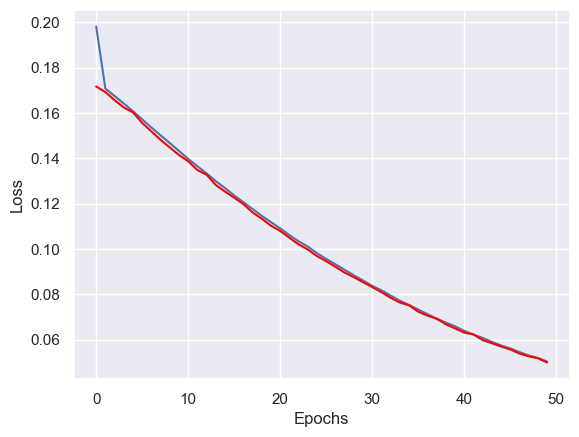

In [ ]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.plot(historyTEFF.history['val_loss'][:], color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Dwarfs.h5


In [ ]:
predTeff = modelTEFF.predict(X_test)

96/96 [==============================] - 0s 2ms/step


In [ ]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

In [ ]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0013909           5686.630371  
iDR4_3_SPLUS-s02s24_0021190           5537.130371  
iDR4_3_STRIPE82-0026_0051692          5165.560059  
iDR4_3_STRIPE82-0026_0040987          5179.758301  
iDR4_3_SPLUS-n01s38_0001722           5700.687012  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5592.341309  
iDR4_3_STRIPE82-0101_0051898          5553.937012  
iDR4_3_STRIPE82-0026_0051498          5653.212891  
iDR4_3_STRIPE82-0024_0035879          5414.467285  
iDR4_3_SPLUS-n07s42_0032863           5129.409668  

[3053 rows x 12 columns]

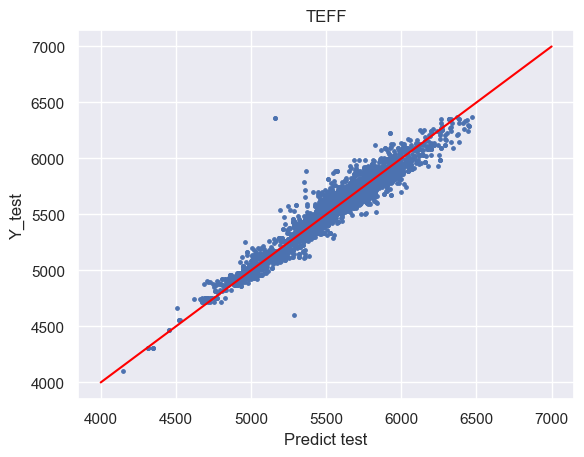

In [ ]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(5200, 6200)
#plt.ylim(5200, 6200)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 7000], [4000, 7000], c='red')

In [ ]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Mean Absolute Error: ', mean_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Median Absolute Error: ', median_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']) * 100, '%')

The accuracy of our model is 93.0%
Mean Squared Error:  8150.541039620684
Mean Absolute Error:  63.89522918031445
Median Absolute Error:  47.47828124999978
Mean Absolute Percentage Error:  1.1526347408720348 %


In [ ]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0013909           5661.442871  
iDR4_3_SPLUS-s02s24_0021190           5533.088379  
iDR4_3_STRIPE82-0026_0051692          5184.746094  
iDR4_3_STRIPE82-0026_0040987          5224.722656  
iDR4_3_SPLUS-n01s38_0001722           5723.327148  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758  
iDR4_3_STRIPE82-0101_0051898          5564.924805  
iDR4_3_STRIPE82-0026_0051498          5678.329102  
iDR4_3_STRIPE82-0024_0035879          5400.931152  
iDR4_3_SPLUS-n07s42_0032863           5124.907227  

[3053 rows x 12 columns]

In [ ]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [69]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [70]:
modelLOGG = training_model()

In [71]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000


4/4 - 1s - loss: 11.2926 - val_loss: 6.2109 - 722ms/epoch - 180ms/step
Epoch 2/5000
4/4 - 0s - loss: 4.6641 - val_loss: 2.4700 - 60ms/epoch - 15ms/step
Epoch 3/5000
4/4 - 0s - loss: 2.1496 - val_loss: 1.8018 - 60ms/epoch - 15ms/step
Epoch 4/5000
4/4 - 0s - loss: 1.9493 - val_loss: 1.7022 - 77ms/epoch - 19ms/step
Epoch 5/5000
4/4 - 0s - loss: 1.5865 - val_loss: 1.0350 - 56ms/epoch - 14ms/step
Epoch 6/5000
4/4 - 0s - loss: 0.9279 - val_loss: 0.6357 - 54ms/epoch - 14ms/step
Epoch 7/5000
4/4 - 0s - loss: 0.6401 - val_loss: 0.5875 - 59ms/epoch - 15ms/step
Epoch 8/5000
4/4 - 0s - loss: 0.5924 - val_loss: 0.5192 - 62ms/epoch - 16ms/step
Epoch 9/5000
4/4 - 0s - loss: 0.4814 - val_loss: 0.3874 - 57ms/epoch - 14ms/step
Epoch 10/5000
4/4 - 0s - loss: 0.3819 - val_loss: 0.3554 - 57ms/epoch - 14ms/step
Epoch 11/5000
4/4 - 0s - loss: 0.3540 - val_loss: 0.3187 - 57ms/epoch - 14ms/step
Epoch 12/5000
4/4 - 0s - loss: 0.3141 - val_loss: 0.3025 - 56ms/epoch - 14ms/step
Epoch 13/5000
4/4 - 0s - loss: 0.30

Text(0, 0.5, 'Loss')

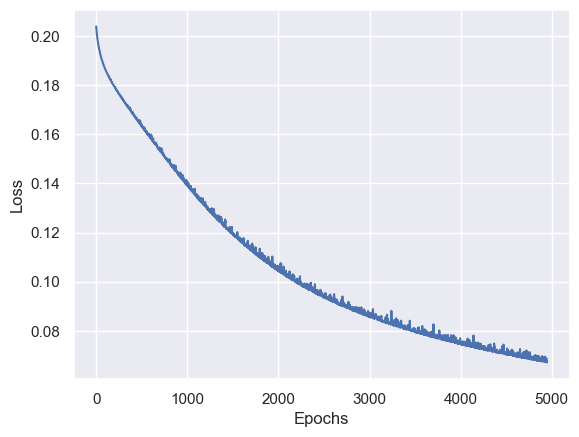

In [72]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

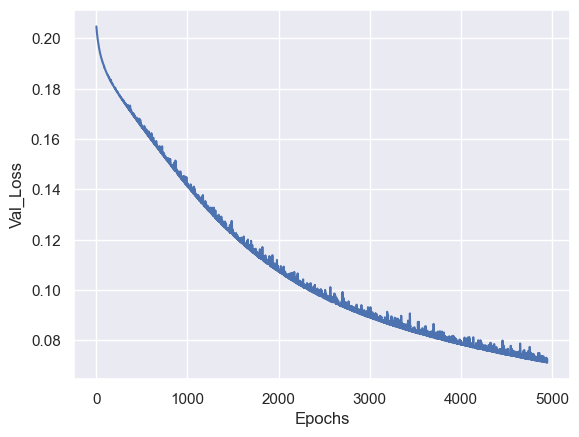

In [73]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [81]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Dwarfs.h5


In [75]:
predlogg = modelLOGG.predict(X_test)

 1/96 [..............................] - ETA: 6s

96/96 [==============================] - 0s 2ms/step


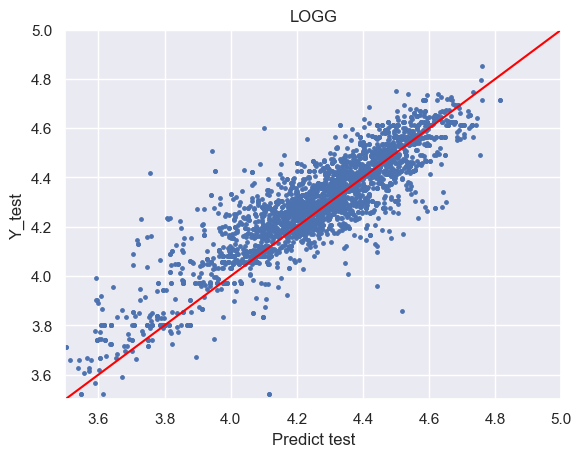

In [83]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.5, 5)
plt.ylim(3.5, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [84]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [78]:
Y_test['LOGG_Predict'] = predlogg

In [79]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n07s42_0013909           5661.442871      4.462332  
iDR4_3_SPLUS-s02s24_0021190           5533.088379      4.133078  
iDR4_3_STRIPE82-0026_0051692          5184.746094      4.359337  
iDR4_3_STRIPE82-0026_0040987          5224.722656      4.454075  
iDR4_3_SPLUS-n01s38_0001722           5723.327148      3.992266  
...                                           ...           ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758      4.284736  
iDR4_3_STRIPE82-0101_0051898          5564.924805      4.128642  
iDR4_3_STRIPE82-0026_0051498          5678.329102      4.404918  
iDR4_3_STRIPE82-0024_0035879          5400.931152      4.392253  
iDR4_3_SPLUS-n07s42_0032863           5124.907227      4.525121  

[3053 rows x 13 columns]

In [80]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [85]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [88]:
modelFEH = training_model()

In [89]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2500


4/4 - 1s - loss: 0.2756 - val_loss: 0.2352 - 664ms/epoch - 166ms/step
Epoch 2/2500
4/4 - 0s - loss: 0.2241 - val_loss: 0.2083 - 66ms/epoch - 17ms/step
Epoch 3/2500
4/4 - 0s - loss: 0.2055 - val_loss: 0.1969 - 58ms/epoch - 15ms/step
Epoch 4/2500
4/4 - 0s - loss: 0.1991 - val_loss: 0.1920 - 58ms/epoch - 15ms/step
Epoch 5/2500
4/4 - 0s - loss: 0.1925 - val_loss: 0.1893 - 64ms/epoch - 16ms/step
Epoch 6/2500
4/4 - 0s - loss: 0.1893 - val_loss: 0.1879 - 58ms/epoch - 15ms/step
Epoch 7/2500
4/4 - 0s - loss: 0.1870 - val_loss: 0.1849 - 61ms/epoch - 15ms/step
Epoch 8/2500
4/4 - 0s - loss: 0.1851 - val_loss: 0.1835 - 59ms/epoch - 15ms/step
Epoch 9/2500
4/4 - 0s - loss: 0.1840 - val_loss: 0.1820 - 59ms/epoch - 15ms/step
Epoch 10/2500
4/4 - 0s - loss: 0.1826 - val_loss: 0.1809 - 54ms/epoch - 14ms/step
Epoch 11/2500
4/4 - 0s - loss: 0.1815 - val_loss: 0.1799 - 59ms/epoch - 15ms/step
Epoch 12/2500
4/4 - 0s - loss: 0.1807 - val_loss: 0.1794 - 59ms/epoch - 15ms/step
Epoch 13/2500
4/4 - 0s - loss: 0.180

Text(0, 0.5, 'Loss')

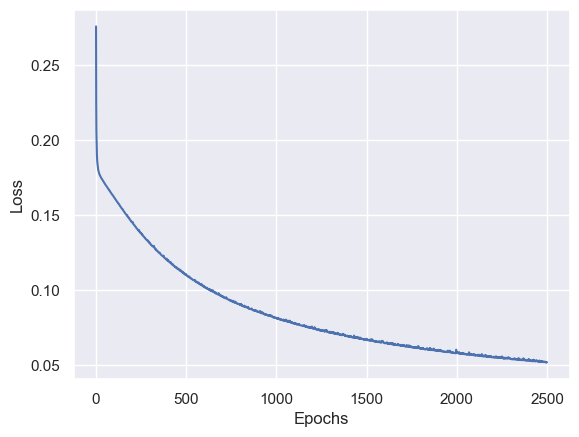

In [90]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

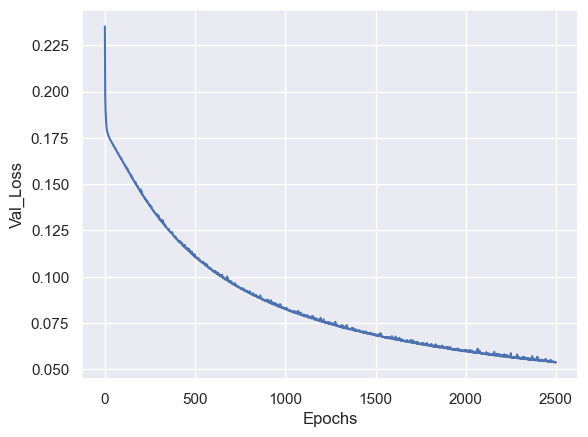

In [91]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [99]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Dwarfs.h5


In [93]:
predfeh = modelFEH.predict(X_test)

 1/96 [..............................] - ETA: 6s

96/96 [==============================] - 0s 2ms/step


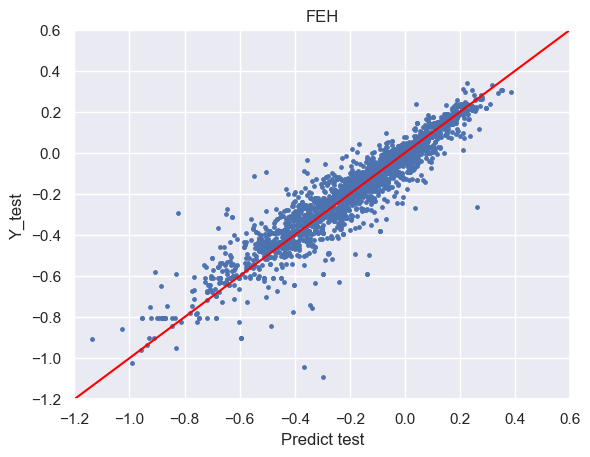

In [94]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [95]:
score = r2_score(Y_test['feh_cnn'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 89.0%


In [96]:
Y_test['FEH_Predict'] = predfeh

In [97]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n07s42_0013909           5661.442871      4.462332    -0.450319  
iDR4_3_SPLUS-s02s24_0021190           5533.088379      4.133078    -0.169534  
iDR4_3_STRIPE82-0026_0051692          5184.746094      4.359337     0.079410  
iDR4_3_STRIPE82-0026_0040987          5224.722656      4.454075    -0.188479  
iDR4_3_SPLUS-n01s38_0001722           5723.327148      3.992266    -0.776093  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758      4.284736    -0.120741  
iDR4_3_STRIPE82-0101_0051898          5564.924805      4.128642    -0.265312  
iDR4_3_STRIPE82-0026_0051498          5678.329102      4.404918    -0.392208  
iDR4_3_STRIPE82-0024_0035879          5400.931152      4.392253    -0.457887  
iDR4_3_SPLUS-n07s42_0032863           5124.907227      4.525121    -0.290345  

[3053 rows x 14 columns]

In [98]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [100]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [101]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s18_0029310   0.5697  0.7395  1.0306  1.0816  1.2142  1.3414   
iDR4_3_SPLUS-n01s18_0031529   0.4485  0.4875  1.0369  1.0755  1.3166  1.4603   
iDR4_3_SPLUS-n01s19_0045021   0.2409  0.5753  1.4396  1.6008  2.1291  2.3119   
iDR4_3_SPLUS-n01s19_0048485   0.2959  0.4969  1.2107  1.3305  1.7701  1.9611   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0170_0008897  0.3873  0.4174  0.8736  0.9431  1.1526  1.3089   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   
iDR4_3_STRIPE82-0170_0016094  0.3468  0.4039  1.0041  1.0735  1.3610  1.5564   
iDR4_3_STRIPE82-0170_0017644  0.3774  0.4183  0.9183  0.9962  1.2150  1.3873   
iDR4_3_STRIPE82-0170_0032934  0.3975  0.4614  0.9291  0.9973  1.1492  1.3892   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s18_0029310   1.3805  1.4101  1.3538  1.3980  ...   6256.60   
iDR4_3_SPLUS-n01s18_0031529   1.6504  1.6411  1.7357  1.7142  ...   5918.05   
iDR4_3_SPLUS-n01s19_0045021   2.7252  2.7748  2.8291  2.9344  ...   5172.47   
iDR4_3_SPLUS-n01s19_0048485   2.2367  2.3911  2.3327  2.5385  ...   5330.16   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0170_0008897  1.3910  1.5112  1.4360  1.5922  ...   5975.72   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   
iDR4_3_STRIPE82-0170_0016094  1.7664  1.7971  1.8866  1.8946  ...   5757.61   
iDR4_3_STRIPE82-0170_0017644  1.3895  1.5208  1.4651  1.6518  ...   6134.44   
iDR4_3_STRIPE82-0170_0032934  1.2730  1.3951  1.3613  1.6323  ...   5889.34   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s18_0029310      4.024    0.013        0.050     0.05791   
iDR4_3_SPLUS-n01s18_0031529      4.187   -0.236        0.044     0.05742   
iDR4_3_SPLUS-n01s19_0045021      4.443    0.165       -0.035    -0.02066   
iDR4_3_SPLUS-n01s19_0048485      4.514    0.016       -0.025    -0.04567   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0170_0008897     4.231   -0.276    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094     4.133   -0.116    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644     4.265    0.017    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0032934     4.232   -0.118    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s18_0029310     -0.03644     0.13123     0.09689     0.04636   
iDR4_3_SPLUS-n01s18_0031529      0.01974    -0.00685     0.06785     0.05026   
iDR4_3_SPLUS-n01s19_0045021     -0.00271     0.00595    -0.01282    -0.02333   
iDR4_3_SPLUS-n01s19_0048485      0.00883    -0.01612    -0.04371    -0.05951   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0170_0008897 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [102]:
AnasCoresParams = AnasCores.loc[AnasCores['alpha_m_cnn'] != -9999]

In [103]:
print('cfe =', AnasCoresParams['c_fe'].min())
print('cafe = ', AnasCoresParams['ca_fe'].min())
print('nfe = ', AnasCoresParams['n_fe'].min())
print('mgfe = ', AnasCoresParams['mg_fe'].min())
print('sife = ', AnasCoresParams['si_fe'].min())
print('nife = ', AnasCoresParams['ni_fe'].min())

cfe = -0.24814
cafe =  -0.45868
nfe =  -0.28011
mgfe =  -0.29935
sife =  -0.17489
nife =  -0.2868


In [104]:
xtrain = AnasCoresParams.iloc[:, :66]

In [105]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [106]:
ytrain = AnasCoresParams[columnYtrain]

In [107]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [108]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [109]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [110]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

### Alpha

In [124]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [125]:
modelAlpha = training_model()

In [126]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2202 - val_loss: 0.1792 - 694ms/epoch - 139ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1789 - val_loss: 0.1811 - 130ms/epoch - 26ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1739 - val_loss: 0.1752 - 105ms/epoch - 21ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1735 - val_loss: 0.1693 - 95ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1702 - val_loss: 0.1705 - 73ms/epoch - 15ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1696 - 74ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1681 - 100ms/epoch - 20ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1682 - val_loss: 0.1681 - 87ms/epoch - 17ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1677 - val_loss: 0.1680 - 77ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1675 - val_loss: 0.1674 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1672 - val_loss: 0.1671 - 72ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1669 - val_loss: 0.1669 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

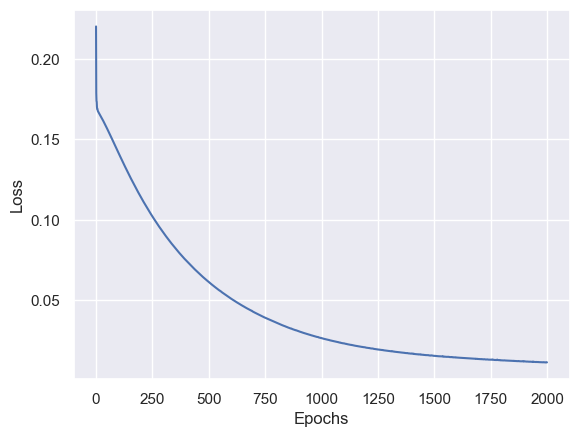

In [127]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

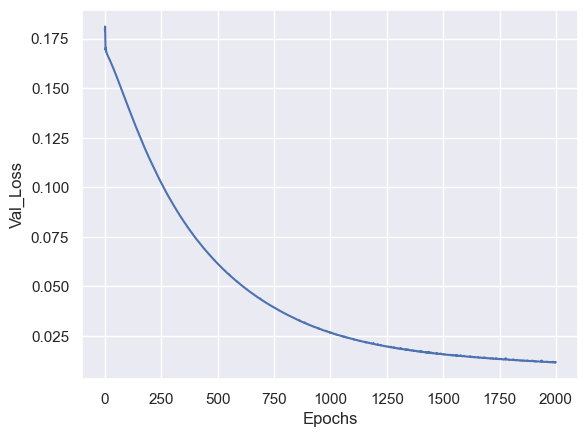

In [128]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [129]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Dwarfs.h5


In [130]:
predalpha = modelAlpha.predict(X_test)

20/83 [======>.......................] - ETA: 0s

83/83 [==============================] - 0s 2ms/step


In [131]:
predalpha

array([[ 0.1260602 ],
       [-0.03897374],
       [-0.01564852],
       ...,
       [ 0.06708889],
       [-0.00159837],
       [-0.00360062]], dtype=float32)

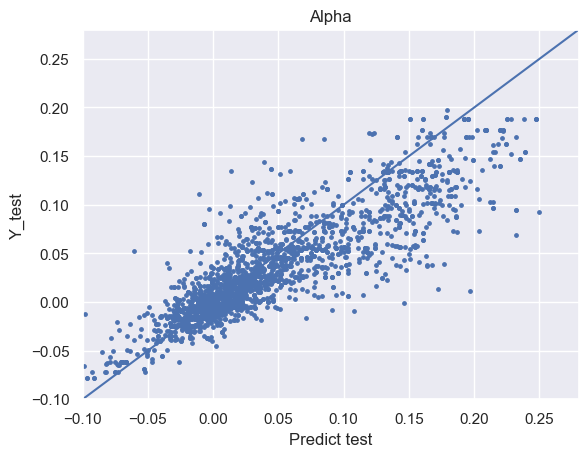

In [132]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [133]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [134]:
Y_test['alpha_predict'] = predalpha

In [135]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060  
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974  
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649  
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388  
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635  
...                               ...            ...  
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005  
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604  
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089  
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598  
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601  

[2649 rows x 11 columns]

In [136]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [151]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [152]:
modelCFE = training_model()

In [153]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2015 - val_loss: 0.1783 - 596ms/epoch - 119ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1779 - val_loss: 0.1756 - 59ms/epoch - 12ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1739 - val_loss: 0.1711 - 59ms/epoch - 12ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1714 - val_loss: 0.1695 - 56ms/epoch - 11ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1702 - val_loss: 0.1687 - 59ms/epoch - 12ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1692 - val_loss: 0.1683 - 64ms/epoch - 13ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1686 - val_loss: 0.1681 - 63ms/epoch - 13ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1681 - val_loss: 0.1677 - 58ms/epoch - 12ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1677 - val_loss: 0.1674 - 63ms/epoch - 13ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1674 - val_loss: 0.1670 - 59ms/epoch - 12ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1670 - val_loss: 0.1668 - 58ms/epoch - 12ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1667 - val_loss: 0.1665 - 60ms/epoch - 12ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.166

Text(0, 0.5, 'Loss')

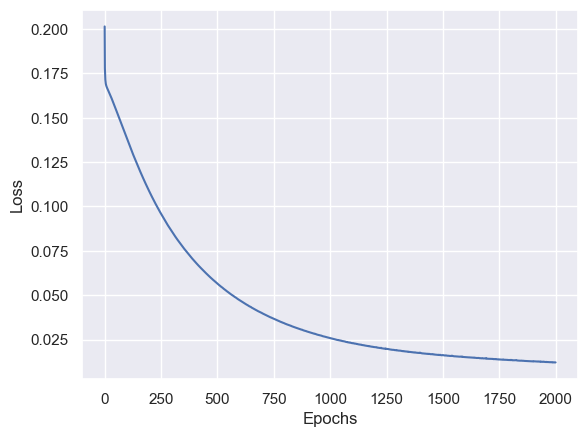

In [154]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

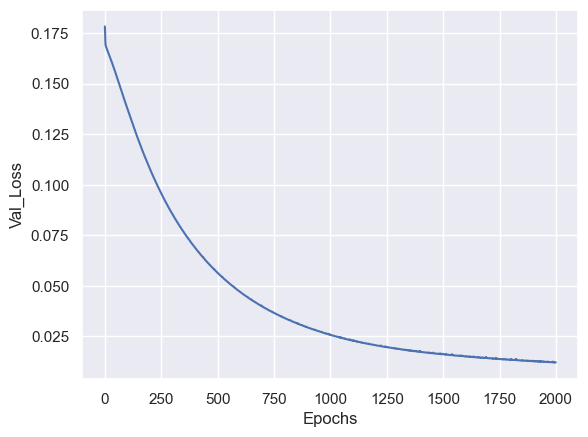

In [155]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [156]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Dwarfs.h5


In [157]:
predCFE = modelCFE.predict(X_test)

83/83 [==============================] - 0s 2ms/step


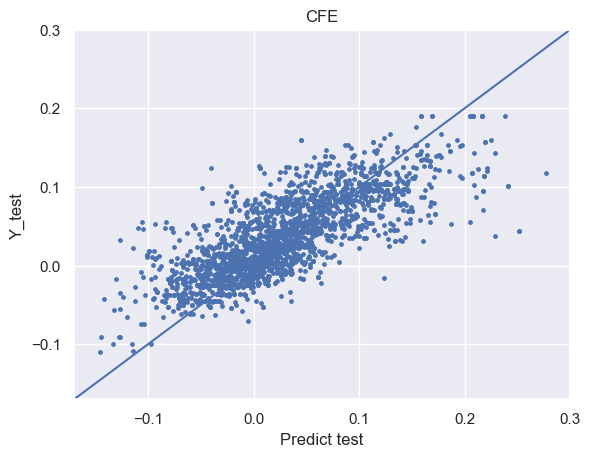

In [158]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [159]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 59.0%


In [160]:
Y_test['CFE_predict'] = predCFE

In [161]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220  
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316  
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217  
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438  
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317  
...                               ...            ...          ...  
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792  
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396  
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104  
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565  
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576  

[2649 rows x 12 columns]

In [162]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [163]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [164]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [165]:
modelCAFE = training_model()

In [166]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2442 - val_loss: 0.1755 - 672ms/epoch - 134ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1893 - val_loss: 0.1782 - 92ms/epoch - 18ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1779 - val_loss: 0.1813 - 100ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1743 - val_loss: 0.1767 - 97ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1737 - val_loss: 0.1712 - 78ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1721 - val_loss: 0.1696 - 77ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1704 - val_loss: 0.1699 - 75ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1696 - val_loss: 0.1698 - 65ms/epoch - 13ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1692 - val_loss: 0.1693 - 65ms/epoch - 13ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1688 - val_loss: 0.1688 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1685 - val_loss: 0.1684 - 69ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1683 - val_loss: 0.1681 - 70ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.16

Text(0, 0.5, 'Loss')

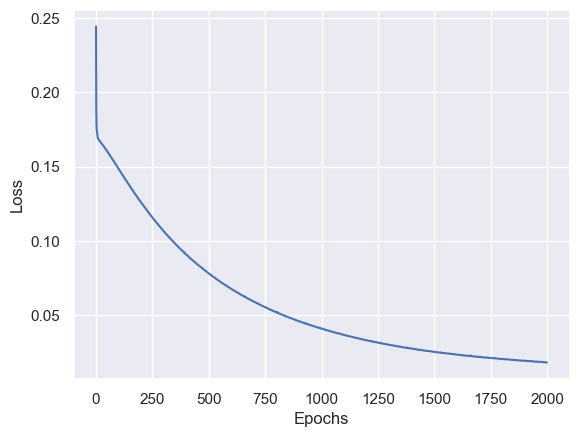

In [167]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

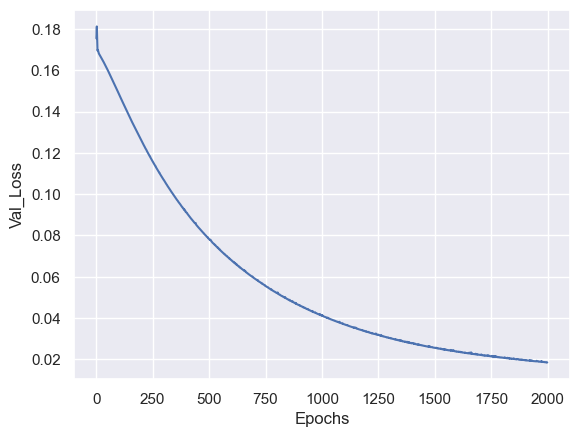

In [168]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [169]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Dwarfs.h5


In [170]:
predCAFE = modelCAFE.predict(X_test)

 1/83 [..............................] - ETA: 6s

83/83 [==============================] - 0s 2ms/step


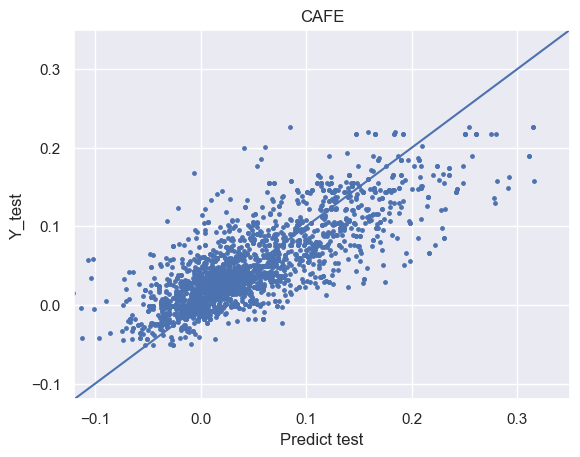

In [171]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [172]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 62.0%


In [173]:
Y_test['CAFE_predict'] = predCAFE

In [174]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0053664      0.132131  
iDR4_3_SPLUS-n06s43_0003986      -0.002348  
iDR4_3_STRIPE82-0163_0043210     -0.019196  
iDR4_3_STRIPE82-0024_0038417      0.016748  
iDR4_3_STRIPE82-0026_0055783      0.021921  
...                                    ...  
iDR4_3_STRIPE82-0026_0051498      0.063414  
iDR4_3_SPLUS-n06s42_0038341       0.087263  
iDR4_3_SPLUS-n07s42_0020791       0.057837  
iDR4_3_STRIPE82-0026_0047510      0.040375  
iDR4_3_STRIPE82-0026_0046410      0.007714  

[2649 rows x 13 columns]

In [175]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [176]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [177]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [178]:
modelNFE = training_model()

In [179]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.4012 - val_loss: 0.2487 - 679ms/epoch - 136ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.2046 - val_loss: 0.2024 - 94ms/epoch - 19ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.2003 - val_loss: 0.1846 - 96ms/epoch - 19ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1887 - val_loss: 0.1855 - 93ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1803 - val_loss: 0.1794 - 79ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1804 - val_loss: 0.1776 - 78ms/epoch - 16ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1783 - val_loss: 0.1782 - 77ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1772 - val_loss: 0.1757 - 71ms/epoch - 14ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1764 - val_loss: 0.1752 - 71ms/epoch - 14ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1759 - val_loss: 0.1753 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1755 - val_loss: 0.1748 - 66ms/epoch - 13ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1752 - val_loss: 0.1746 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.175

Text(0, 0.5, 'Loss')

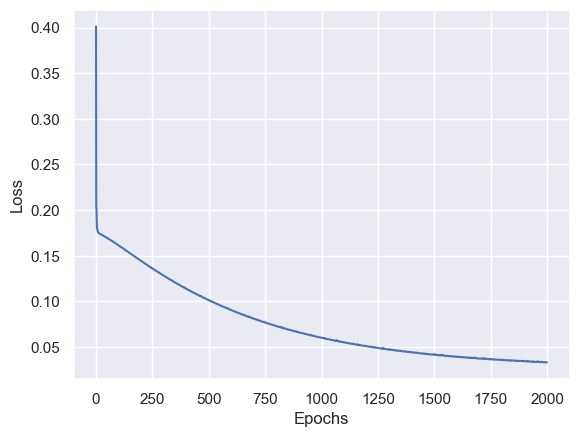

In [180]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

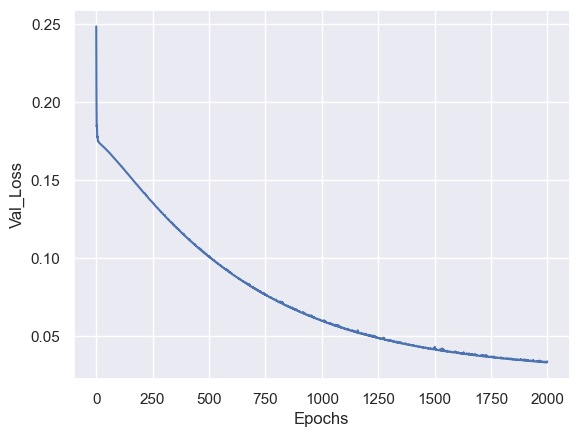

In [181]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [182]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Dwarfs.h5


In [183]:
predNFE = modelNFE.predict(X_test)

 1/83 [..............................] - ETA: 5s

83/83 [==============================] - 0s 2ms/step


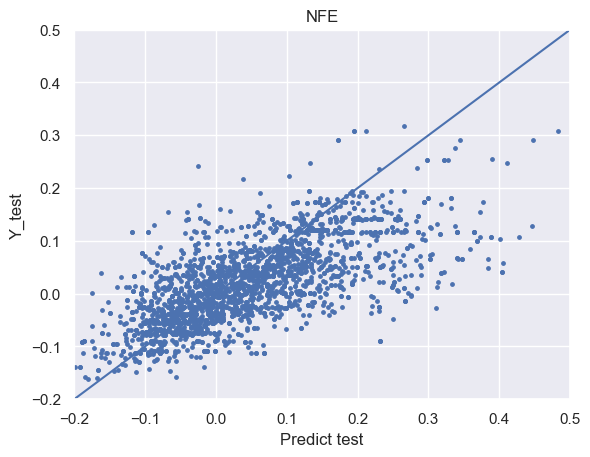

In [184]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [185]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 41.0%


In [186]:
Y_test['NFE_predict'] = predNFE

In [187]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247  
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618  
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867  
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503  
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240  
...                                    ...          ...  
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273  
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667  
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273  
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617  
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567  

[2649 rows x 14 columns]

In [188]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [189]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [190]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [191]:
modelMGFE = training_model()

In [192]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.1924 - val_loss: 0.1746 - 617ms/epoch - 123ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1774 - val_loss: 0.1752 - 106ms/epoch - 21ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1745 - val_loss: 0.1738 - 101ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1725 - val_loss: 0.1719 - 105ms/epoch - 21ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1712 - val_loss: 0.1712 - 81ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1704 - val_loss: 0.1704 - 78ms/epoch - 16ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1699 - val_loss: 0.1698 - 71ms/epoch - 14ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1694 - val_loss: 0.1692 - 69ms/epoch - 14ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1689 - 72ms/epoch - 14ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1686 - val_loss: 0.1687 - 80ms/epoch - 16ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1683 - val_loss: 0.1682 - 77ms/epoch - 15ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1679 - val_loss: 0.1679 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

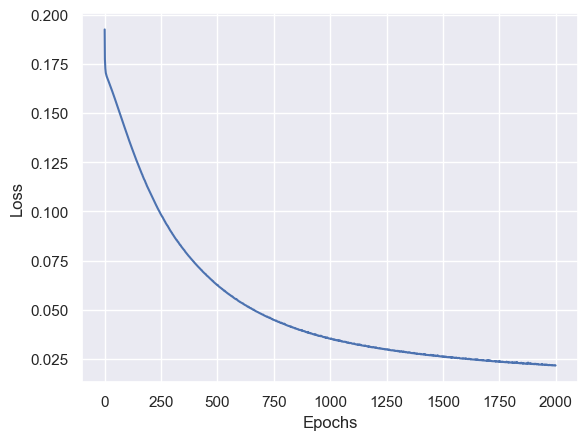

In [193]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

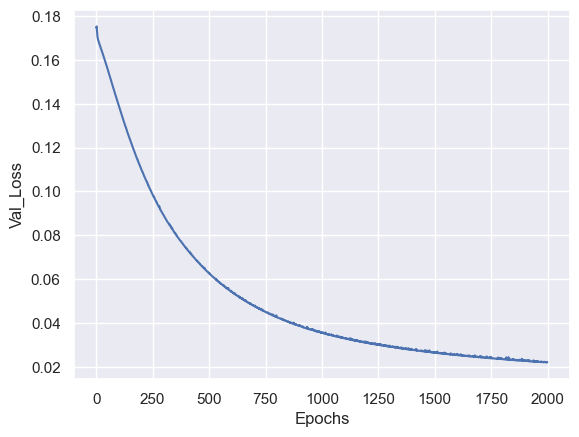

In [194]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [195]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Dwarfs.h5


In [196]:
predMGFE = modelMGFE.predict(X_test)

 1/83 [..............................] - ETA: 5s

83/83 [==============================] - 0s 2ms/step


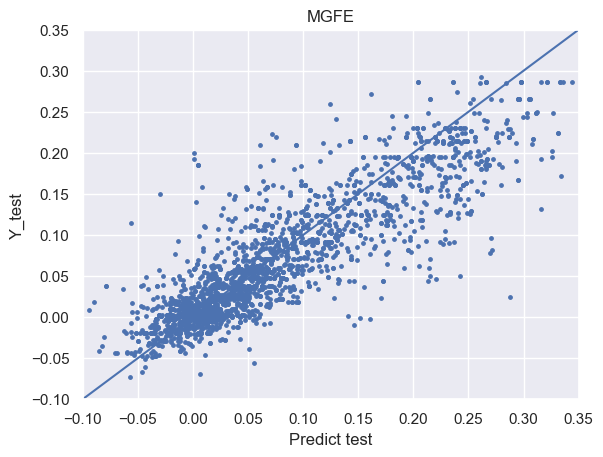

In [197]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [198]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


In [199]:
Y_test['MGFE_predict'] = predMGFE

In [200]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843  
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361  
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039  
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072  
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055  
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901  
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415  
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971  
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385  

[2649 rows x 15 columns]

In [201]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [202]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [203]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [204]:
modelSIFE = training_model()

In [205]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.5843 - val_loss: 0.1966 - 658ms/epoch - 132ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.2463 - val_loss: 0.2497 - 106ms/epoch - 21ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.2113 - val_loss: 0.1731 - 101ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1788 - val_loss: 0.1884 - 81ms/epoch - 16ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1855 - val_loss: 0.1747 - 81ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1719 - val_loss: 0.1710 - 73ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1725 - val_loss: 0.1729 - 123ms/epoch - 25ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1716 - val_loss: 0.1694 - 78ms/epoch - 16ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1695 - val_loss: 0.1699 - 76ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1700 - val_loss: 0.1693 - 77ms/epoch - 15ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1691 - val_loss: 0.1688 - 72ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1689 - val_loss: 0.1688 - 69ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

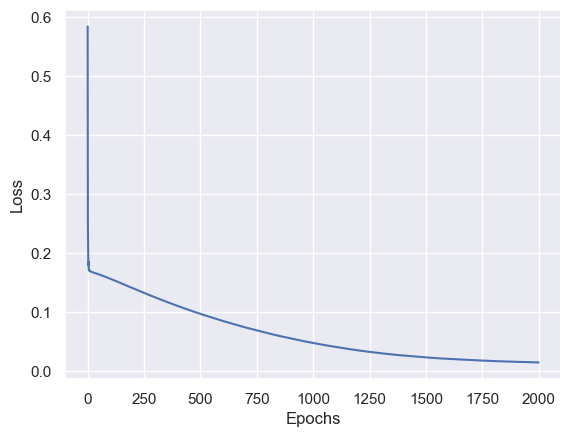

In [206]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

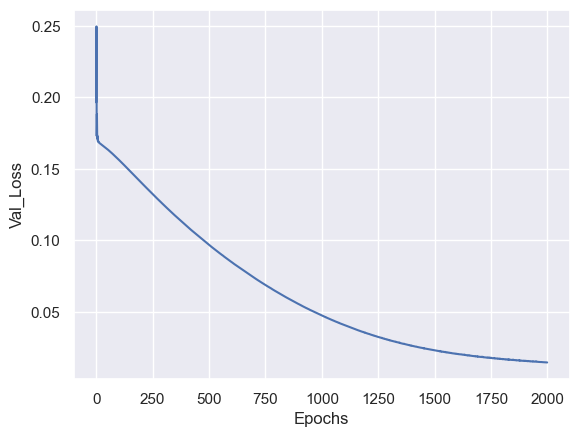

In [207]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [208]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Dwarfs.h5


In [209]:
predSIFE = modelSIFE.predict(X_test)

83/83 [==============================] - 0s 2ms/step


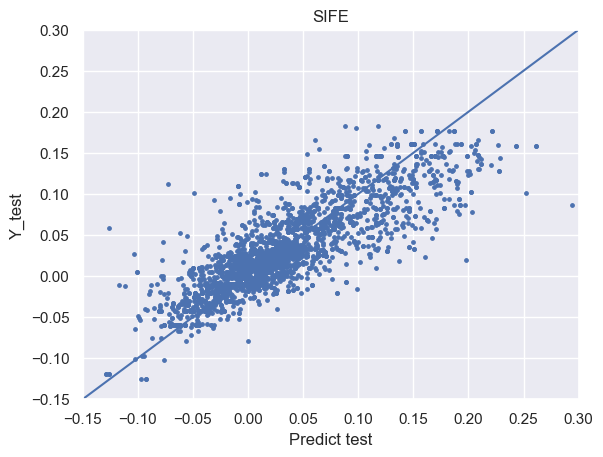

In [210]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [211]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 69.0%


In [212]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [213]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843   
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361   
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039   
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072   
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055   
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901   
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415   
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971   
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0053664      0.127683  
iDR4_3_SPLUS-n06s43_0003986      -0.022084  
iDR4_3_STRIPE82-0163_0043210      0.0

In [214]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [215]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [216]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [217]:
modelNIFE = training_model()

In [218]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.1886 - val_loss: 0.1708 - 650ms/epoch - 130ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1722 - val_loss: 0.1700 - 112ms/epoch - 22ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1694 - val_loss: 0.1686 - 105ms/epoch - 21ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1684 - val_loss: 0.1675 - 73ms/epoch - 15ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1674 - val_loss: 0.1672 - 72ms/epoch - 14ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1668 - val_loss: 0.1667 - 99ms/epoch - 20ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1664 - val_loss: 0.1661 - 76ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1660 - val_loss: 0.1659 - 80ms/epoch - 16ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1657 - val_loss: 0.1656 - 74ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1654 - val_loss: 0.1652 - 70ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1651 - val_loss: 0.1649 - 65ms/epoch - 13ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1648 - val_loss: 0.1647 - 64ms/epoch - 13ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

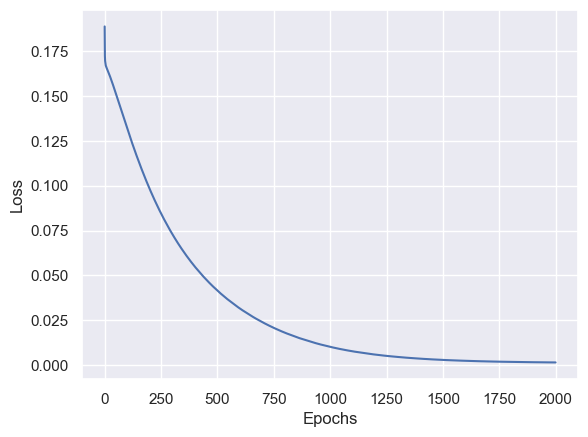

In [219]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

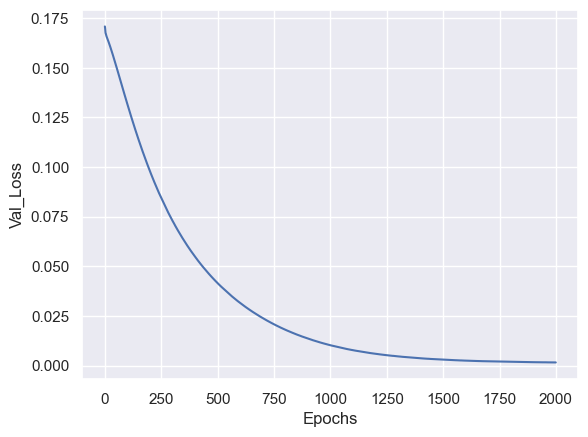

In [220]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [221]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Dwarfs.h5


In [222]:
predNIFE = modelNIFE.predict(X_test)

32/83 [==========>...................] - ETA: 0s

83/83 [==============================] - 0s 2ms/step


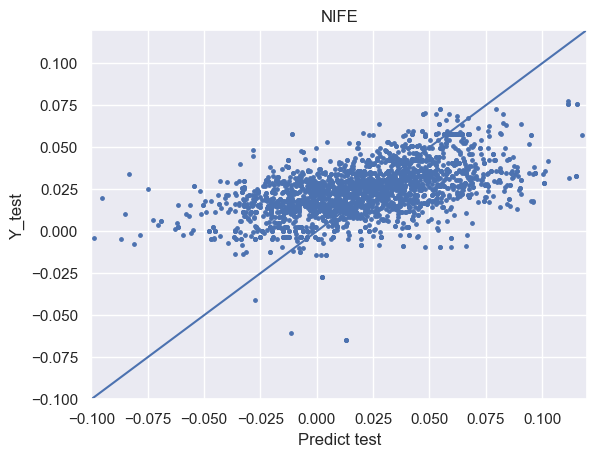

In [223]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [224]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 28.999999999999996%


In [225]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [226]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843   
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361   
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039   
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072   
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055   
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901   
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415   
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971   
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0026_0053664      0.127683      0.049375  
iDR4_3_SPLUS-n06s43_0003986      -0.0220

In [227]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [4]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [5]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0169_0035197  0.2690  0.6372  1.3798  1.6699  2.2881  2.4889   
iDR4_3_STRIPE82-0170_0003456  0.2620  0.7486  1.6325  2.0468  2.7619  2.9739   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0169_0035197  3.0563  3.1318  3.3034  3.4023  ...   4888.76   
iDR4_3_STRIPE82-0170_0003456  3.4152  3.6347  3.6426  4.0637  ...   4593.41   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109     0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168     0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118     0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002     0.06467   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197     3.445    0.123    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0003456     2.642    0.181    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s25_0030049      0.13283    -0.10485     0.15748     0.07473   
iDR4_3_SPLUS-n01s26_0002285      0.15676    -0.08000     0.26085     0.08862   
iDR4_3_SPLUS-n01s26_0009057      0.11936     0.05200     0.19804     0.08521   
iDR4_3_SPLUS-n01s26_0011242      0.00800     0.18223     0.03295     0.00689   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [6]:
xtrain = GigCores.iloc[:, :66]

In [7]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [8]:
ytrain = GigCores[columnYtrain]

In [9]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [10]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [11]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [12]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [13]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0005_0035429   4681.19     2.439   -0.532        0.199   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_SPLUS-s02s25_0031332    4870.06     3.058   -0.421        0.187   
iDR4_3_STRIPE82-0130_0034080   4952.20     3.542   -0.231        0.143   
iDR4_3_SPLUS-s02s25_0034233    4968.90     2.733   -0.526        0.061   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n03s28_0023758    4924.41     3.291    0.087       -0.012   
iDR4_3_SPLUS-s02s23_0019010    4914.76     3.323    0.020        0.011   
iDR4_3_STRIPE82-0026_0045166   4912.66     2.764   -0.657        0.202   
iDR4_3_SPLUS-n06s41_0014662    4944.27     3.305    0.026        0.007   
iDR4_3_STRIPE82-0101_0091026   4864.97     2.427   -0.409    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0005_0035429     0.13893     0.16746     0.02678     0.27778   
iDR4_3_STRIPE82-0130_0030550     0.19900     0.09656     0.07049     0.21585   
iDR4_3_SPLUS-s02s25_0031332      0.16542     0.19304    -0.03170     0.26501   
iDR4_3_STRIPE82-0130_0034080     0.12637     0.12494    -0.01804     0.23144   
iDR4_3_SPLUS-s02s25_0034233      0.06011     0.09712     0.13121     0.10617   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n03s28_0023758     -0.04965     0.01119     0.08620    -0.00105   
iDR4_3_SPLUS-s02s23_0019010      0.00351     0.02594     0.09526     0.04463   
iDR4_3_STRIPE82-0026_0045166     0.15279     0.16344     0.10230     0.27082   
iDR4_3_SPLUS-n06s41_0014662      0.03078     0.03188     0.18393     0.03691   
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_STRIPE82-0005_0035429     0.19652     0.09616    -0.233154  
iDR4_3_STRIPE82-0130_0030550     0.17819     0.10353    -0.141684  
iDR4_3_SPLUS-s02s25_0031332      0.15857     0.07585    -0.009344  
iDR4_3_STRIPE82-0130_0034080     0.11278     0.07433     0.087992  
iDR4_3_SPLUS-s02s25_0034233      0.06406     0.05813     0.107781  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n03s28_0023758     -0.01670    -0.01140     0.055061  
iDR4_3_SPLUS-s02s23_0019010     -0.00072     0.01798     0.043626  
iDR4_3_STRIPE82-0026_0045166     0.20976     0.13203     0.041137  
iDR4_3_SPLUS-n06s41_0014662      0.00107     0.07044     0.078595  
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000    -0.015375  

[1615 rows x 11 columns]

### Teff

In [14]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [16]:
modelTEFF = training_model()

In [17]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 4s - loss: 0.2589 - val_loss: 0.2049 - 4s/epoch - 2s/step
Epoch 2/3000
2/2 - 0s - loss: 0.1932 - val_loss: 0.1990 - 47ms/epoch - 24ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.1947 - val_loss: 0.1982 - 46ms/epoch - 23ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.1914 - val_loss: 0.1872 - 49ms/epoch - 25ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1832 - val_loss: 0.1824 - 50ms/epoch - 25ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1795 - val_loss: 0.1803 - 46ms/epoch - 23ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1796 - val_loss: 0.1815 - 44ms/epoch - 22ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1800 - val_loss: 0.1802 - 44ms/epoch - 22ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1774 - val_loss: 0.1802 - 44ms/epoch - 22ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1763 - val_loss: 0.1808 - 46ms/epoch - 23ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1761 - val_loss: 0.1809 - 42ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1762 - val_loss: 0.1804 - 42ms/epoch - 21ms/step
Epoch 13/3000
2/2 - 0s - loss

Text(0, 0.5, 'Loss')

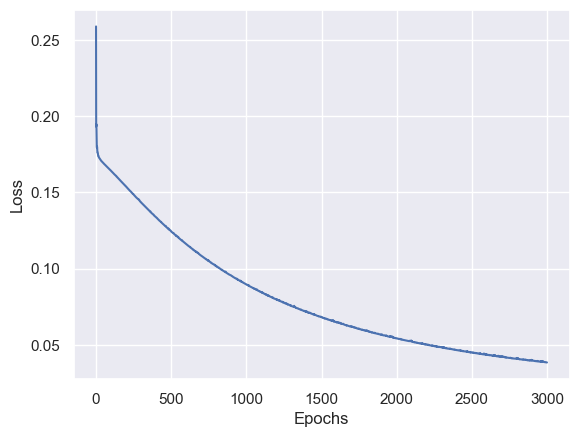

In [18]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

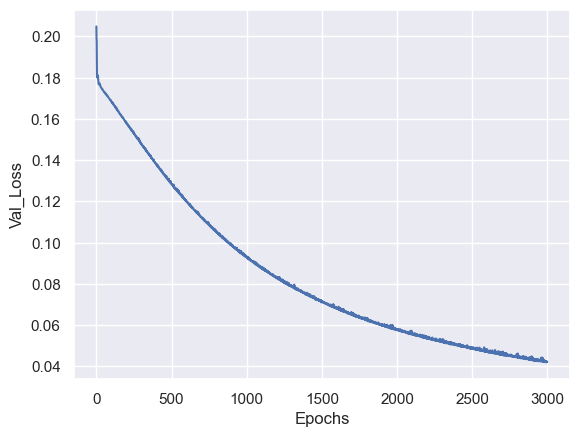

In [19]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [28]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Giants.h5


In [21]:
predTeff = modelTEFF.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [22]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530  
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466  
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948  
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390  
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138  
...                                  ...         ...          ...  
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217  
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672  
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696  
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148  
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335  

[449 rows x 11 columns]

In [23]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

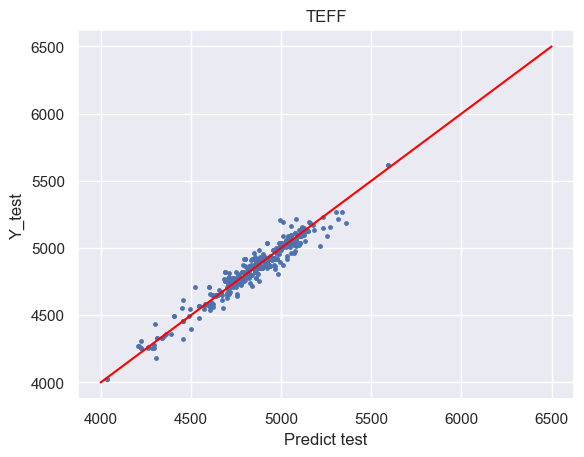

In [24]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [25]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [26]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0048095           5214.414551  
iDR4_3_STRIPE82-0026_0045166          4919.829590  
iDR4_3_SPLUS-n01s28_0002841           4787.844238  
iDR4_3_SPLUS-s02s25_0034233           4988.571289  
iDR4_3_STRIPE82-0130_0030276          4265.732910  
...                                           ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180  
iDR4_3_STRIPE82-0101_0019214          4545.962891  
iDR4_3_STRIPE82-0026_0048087          4741.270508  
iDR4_3_SPLUS-s02s25_0026562           5097.572266  
iDR4_3_SPLUS-n06s43_0032581           4581.278320  

[449 rows x 12 columns]

In [27]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [29]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [30]:
modelLOGG = training_model()

In [31]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 6.0666 - val_loss: 5.0268 - 583ms/epoch - 583ms/step
Epoch 2/2000
1/1 - 0s - loss: 5.0303 - val_loss: 4.1165 - 107ms/epoch - 107ms/step
Epoch 3/2000
1/1 - 0s - loss: 4.1092 - val_loss: 3.3439 - 68ms/epoch - 68ms/step
Epoch 4/2000
1/1 - 0s - loss: 3.3188 - val_loss: 2.7081 - 51ms/epoch - 51ms/step
Epoch 5/2000
1/1 - 0s - loss: 2.6624 - val_loss: 2.2019 - 50ms/epoch - 50ms/step
Epoch 6/2000
1/1 - 0s - loss: 2.1324 - val_loss: 1.8121 - 54ms/epoch - 54ms/step
Epoch 7/2000
1/1 - 0s - loss: 1.7158 - val_loss: 1.5246 - 46ms/epoch - 46ms/step
Epoch 8/2000
1/1 - 0s - loss: 1.4040 - val_loss: 1.3238 - 48ms/epoch - 48ms/step
Epoch 9/2000
1/1 - 0s - loss: 1.1853 - val_loss: 1.1933 - 45ms/epoch - 45ms/step
Epoch 10/2000
1/1 - 0s - loss: 1.0451 - val_loss: 1.1102 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.9624 - val_loss: 1.0560 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.9187 - val_loss: 1.0155 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.8

Text(0, 0.5, 'Loss')

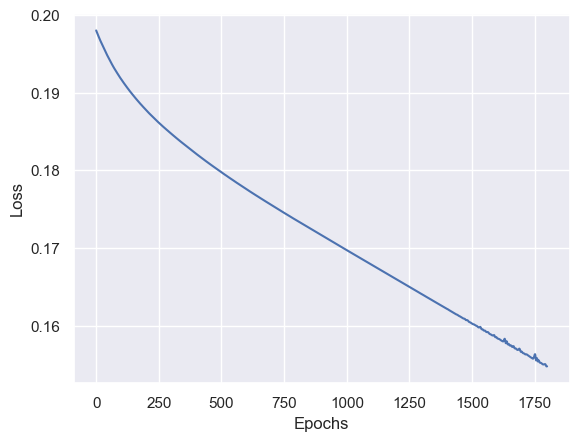

In [32]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

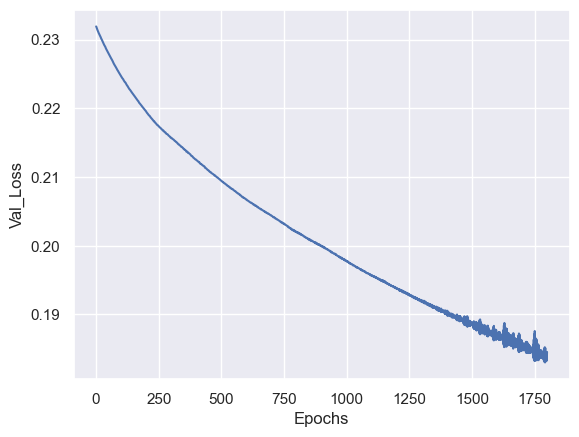

In [33]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [34]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Giants.h5


In [35]:
predlogg = modelLOGG.predict(X_test)

 1/15 [=>............................] - ETA: 0s

15/15 [==============================] - 0s 2ms/step


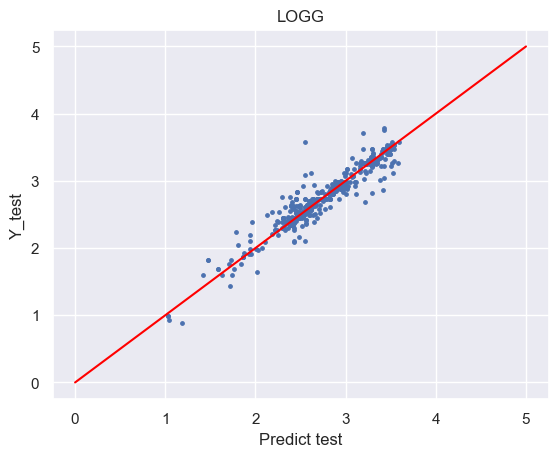

In [36]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [37]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [38]:
Y_test['LOGG_Predict'] = predlogg

In [39]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n07s42_0048095           5214.414551      2.612923  
iDR4_3_STRIPE82-0026_0045166          4919.829590      2.728715  
iDR4_3_SPLUS-n01s28_0002841           4787.844238      2.467403  
iDR4_3_SPLUS-s02s25_0034233           4988.571289      2.842010  
iDR4_3_STRIPE82-0130_0030276          4265.732910      1.439348  
...                                           ...           ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180      3.118953  
iDR4_3_STRIPE82-0101_0019214          4545.962891      2.404386  
iDR4_3_STRIPE82-0026_0048087          4741.270508      2.632808  
iDR4_3_SPLUS-s02s25_0026562           5097.572266      3.352474  
iDR4_3_SPLUS-n06s43_0032581           4581.278320      2.643116  

[449 rows x 13 columns]

In [40]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [41]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [42]:
modelFEH = training_model()

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 1.1455 - val_loss: 0.6921 - 655ms/epoch - 655ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.7710 - val_loss: 0.4544 - 75ms/epoch - 75ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.5159 - val_loss: 0.3206 - 72ms/epoch - 72ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.3634 - val_loss: 0.2617 - 71ms/epoch - 71ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2853 - val_loss: 0.2522 - 63ms/epoch - 63ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2590 - val_loss: 0.2661 - 61ms/epoch - 61ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2601 - val_loss: 0.2833 - 57ms/epoch - 57ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2692 - val_loss: 0.2927 - 56ms/epoch - 56ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2749 - val_loss: 0.2916 - 59ms/epoch - 59ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2735 - val_loss: 0.2814 - 54ms/epoch - 54ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2650 - val_loss: 0.2670 - 53ms/epoch - 53ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2525 - val_loss: 0.2519 - 53ms/epoch - 53ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.239

Text(0, 0.5, 'Loss')

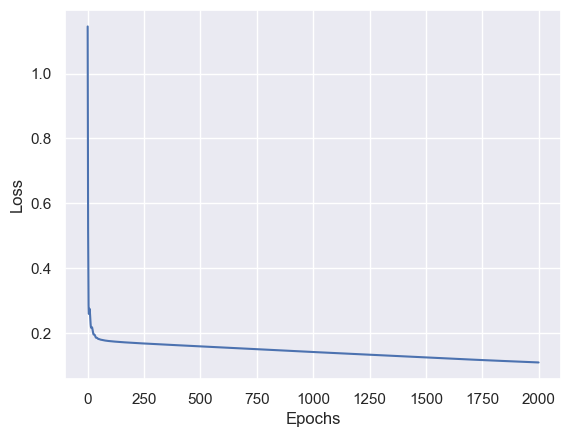

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

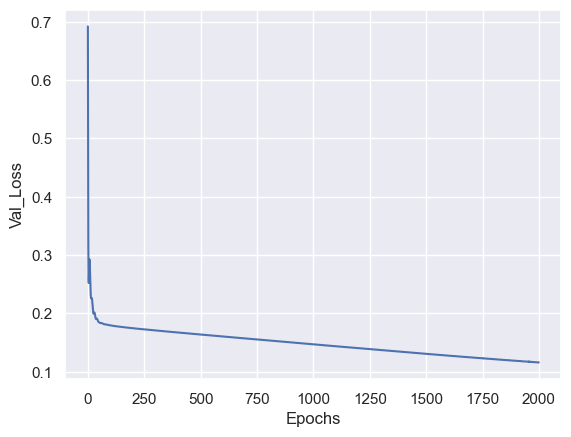

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Giants.h5


In [47]:
predfeh = modelFEH.predict(X_test)

 1/15 [=>............................] - ETA: 0s

15/15 [==============================] - 0s 4ms/step


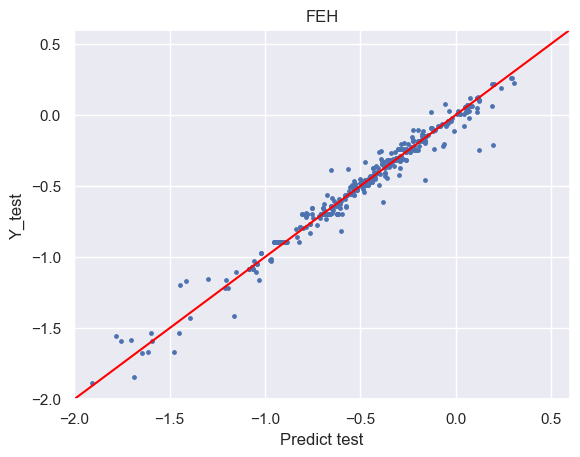

In [48]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [49]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 97.0%


In [50]:
Y_test['FEH_Predict'] = predfeh

In [51]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n07s42_0048095           5214.414551      2.612923    -1.593177  
iDR4_3_STRIPE82-0026_0045166          4919.829590      2.728715    -0.696621  
iDR4_3_SPLUS-n01s28_0002841           4787.844238      2.467403    -0.628348  
iDR4_3_SPLUS-s02s25_0034233           4988.571289      2.842010    -0.487238  
iDR4_3_STRIPE82-0130_0030276          4265.732910      1.439348    -0.819666  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180      3.118953     0.028043  
iDR4_3_STRIPE82-0101_0019214          4545.962891      2.404386    -0.202714  
iDR4_3_STRIPE82-0026_0048087          4741.270508      2.632808    -0.240005  
iDR4_3_SPLUS-s02s25_0026562           5097.572266      3.352474    -0.652629  
iDR4_3_SPLUS-n06s43_0032581           4581.278320      2.643116     0.058042  

[449 rows x 14 columns]

In [52]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [4]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [5]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0169_0035197  0.2690  0.6372  1.3798  1.6699  2.2881  2.4889   
iDR4_3_STRIPE82-0170_0003456  0.2620  0.7486  1.6325  2.0468  2.7619  2.9739   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0169_0035197  3.0563  3.1318  3.3034  3.4023  ...   4888.76   
iDR4_3_STRIPE82-0170_0003456  3.4152  3.6347  3.6426  4.0637  ...   4593.41   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109     0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168     0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118     0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002     0.06467   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197     3.445    0.123    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0003456     2.642    0.181    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s25_0030049      0.13283    -0.10485     0.15748     0.07473   
iDR4_3_SPLUS-n01s26_0002285      0.15676    -0.08000     0.26085     0.08862   
iDR4_3_SPLUS-n01s26_0009057      0.11936     0.05200     0.19804     0.08521   
iDR4_3_SPLUS-n01s26_0011242      0.00800     0.18223     0.03295     0.00689   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [6]:
GigCoresParams = GigCores.loc[GigCores['alpha_m_cnn'] != -9999]

In [7]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0011946  0.3329  0.5624  1.1757  1.3186  1.8714  2.0605   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0011946  2.5632  2.6539  2.7989  2.8394  ...   4987.04   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201  0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109  0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168  0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118  0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002  0.06467   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0168_0011946     3.309   -0.313        0.163  0.11010   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026   0.20527 -0.05186  0.28106  0.16079  0.06973  
iDR4_3_SPLUS-n01s25_0030049   0.13283 -0.10485  0.15748  0.07473  0.06743  
iDR4_3_SPLUS-n01s26_0002285   0.15676 -0.08000  0.26085  0.08862  0.05935  
iDR4_3_SPLUS-n01s26_0009057   0.11936  0.05200  0.19804  0.08521  0.06657  
iDR4_3_SPLUS-n01s26_0011242   0.00800  0.18223  0.03295  0.00689  0.05561  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0168_0011946  0.15580  0.01234  0.25676  0.12517  0.05413  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  

[1885 rows x 76 column

In [8]:
print('cfe =', GigCoresParams['c_fe'].min())
print('cafe = ', GigCoresParams['ca_fe'].min())
print('nfe = ', GigCoresParams['n_fe'].min())
print('mgfe = ', GigCoresParams['mg_fe'].min())
print('sife = ', GigCoresParams['si_fe'].min())
print('nife = ', GigCoresParams['ni_fe'].min())

cfe = -0.8645
cafe =  -0.08675
nfe =  -0.26151
mgfe =  -0.09373
sife =  -0.05048
nife =  -0.13236


In [9]:
xtrain = GigCoresParams.iloc[:, :66]

In [10]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [11]:
ytrain = GigCoresParams[columnYtrain]

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [15]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

### Alpha

In [16]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [17]:
modelAlpha = training_model()

In [18]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500


1/1 - 2s - loss: 0.3303 - val_loss: 0.2066 - 2s/epoch - 2s/step
Epoch 2/1500
1/1 - 0s - loss: 0.2012 - val_loss: 0.1914 - 39ms/epoch - 39ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.1908 - val_loss: 0.2180 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.2208 - val_loss: 0.2193 - 39ms/epoch - 39ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.2216 - val_loss: 0.1995 - 37ms/epoch - 37ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.1999 - val_loss: 0.1806 - 38ms/epoch - 38ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.1800 - val_loss: 0.1737 - 39ms/epoch - 39ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.1740 - val_loss: 0.1775 - 39ms/epoch - 39ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.1792 - val_loss: 0.1836 - 39ms/epoch - 39ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.1862 - val_loss: 0.1859 - 36ms/epoch - 36ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.1882 - val_loss: 0.1831 - 38ms/epoch - 38ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.1845 - val_loss: 0.1776 - 36ms/epoch - 36ms/step
Epoch 13/1500
1/1 - 0s - loss: 0.1781 - va

Text(0, 0.5, 'Loss')

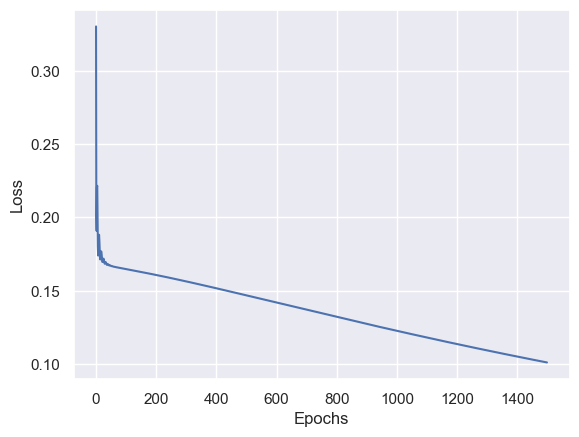

In [19]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

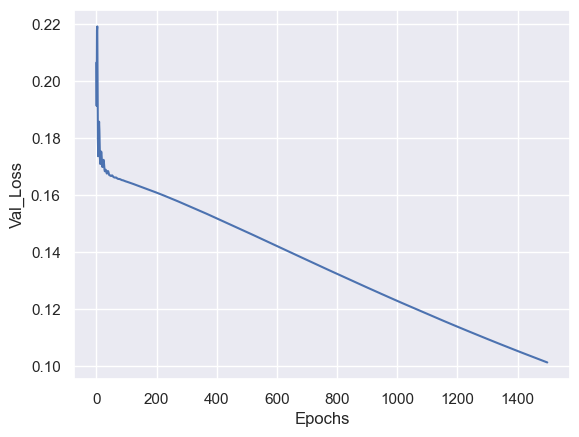

In [20]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [21]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Giants.h5


In [22]:
predalpha = modelAlpha.predict(X_test)

12/12 [==============================] - 0s 3ms/step


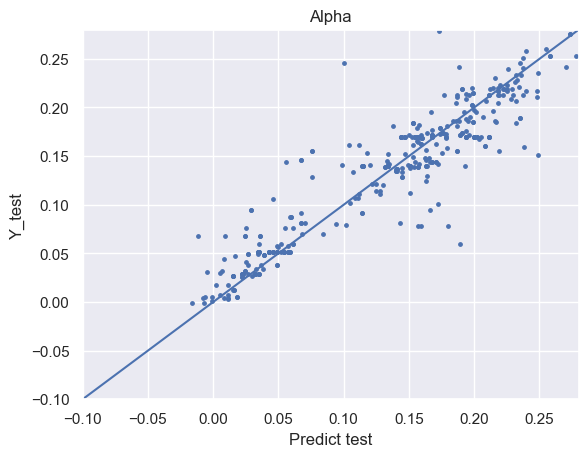

In [23]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [24]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [25]:
Y_test['alpha_predict'] = predalpha

In [26]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659  
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818  
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151  
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193  
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028  
...                               ...            ...  
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683  
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984  
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778  

[377 rows x 11 columns]

In [27]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [28]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [29]:
modelCFE = training_model()

In [30]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.8719 - val_loss: 0.4519 - 666ms/epoch - 666ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.4914 - val_loss: 0.2636 - 125ms/epoch - 125ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2817 - val_loss: 0.1988 - 65ms/epoch - 65ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2047 - val_loss: 0.2066 - 56ms/epoch - 56ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2065 - val_loss: 0.2351 - 55ms/epoch - 55ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2324 - val_loss: 0.2545 - 52ms/epoch - 52ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2505 - val_loss: 0.2564 - 46ms/epoch - 46ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2518 - val_loss: 0.2449 - 48ms/epoch - 48ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2400 - val_loss: 0.2270 - 50ms/epoch - 50ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2229 - val_loss: 0.2092 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2062 - val_loss: 0.1954 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1942 - val_loss: 0.1871 - 52ms/epoch - 52ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

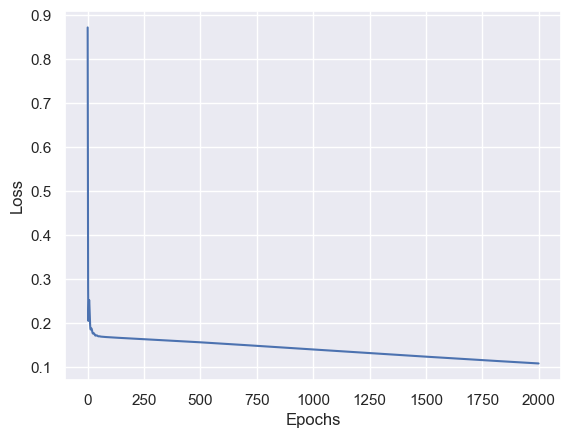

In [31]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

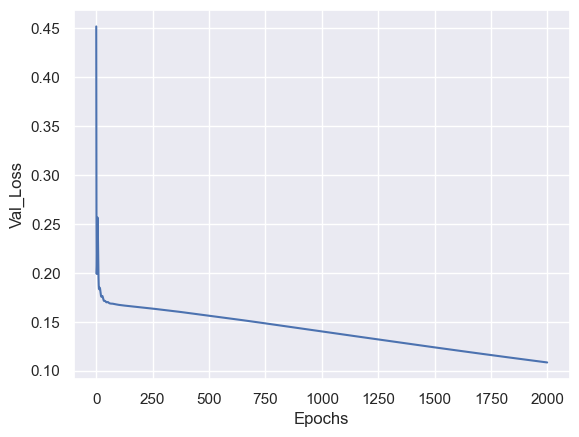

In [32]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [33]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Giants.h5


In [34]:
predCFE = modelCFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 3ms/step


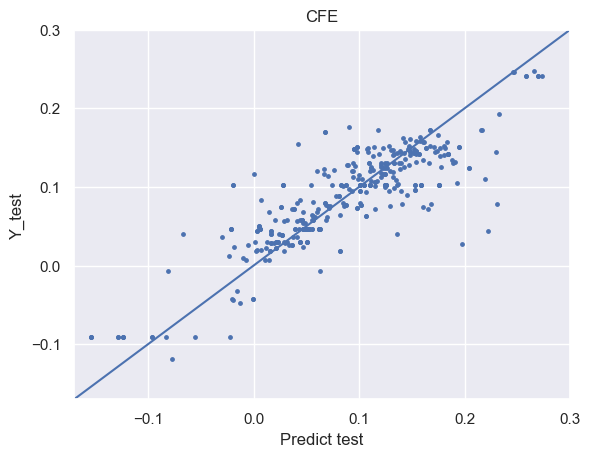

In [35]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [36]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [37]:
Y_test['CFE_predict'] = predCFE

In [38]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880  
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919  
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782  
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075  
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207  
...                               ...            ...          ...  
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074  
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964  
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970  

[377 rows x 12 columns]

In [39]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [40]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [41]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

In [42]:
modelCAFE = training_model()

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200


1/1 - 1s - loss: 0.2217 - val_loss: 0.1932 - 687ms/epoch - 687ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.1919 - val_loss: 0.1855 - 49ms/epoch - 49ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.1853 - val_loss: 0.1806 - 49ms/epoch - 49ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.1814 - val_loss: 0.1798 - 48ms/epoch - 48ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.1813 - val_loss: 0.1804 - 44ms/epoch - 44ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.1816 - val_loss: 0.1778 - 45ms/epoch - 45ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.1782 - val_loss: 0.1738 - 46ms/epoch - 46ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.1736 - val_loss: 0.1710 - 43ms/epoch - 43ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.1709 - val_loss: 0.1704 - 47ms/epoch - 47ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.1707 - val_loss: 0.1710 - 45ms/epoch - 45ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.1715 - val_loss: 0.1715 - 48ms/epoch - 48ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.1721 - val_loss: 0.1716 - 44ms/epoch - 44ms/step
Epoch 13/1200
1/1 - 0s - loss: 0.172

Text(0, 0.5, 'Loss')

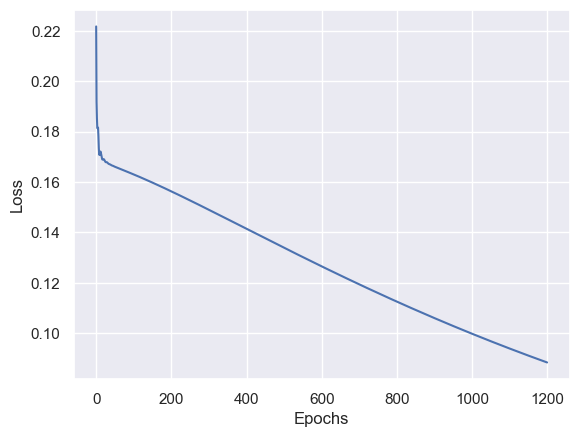

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

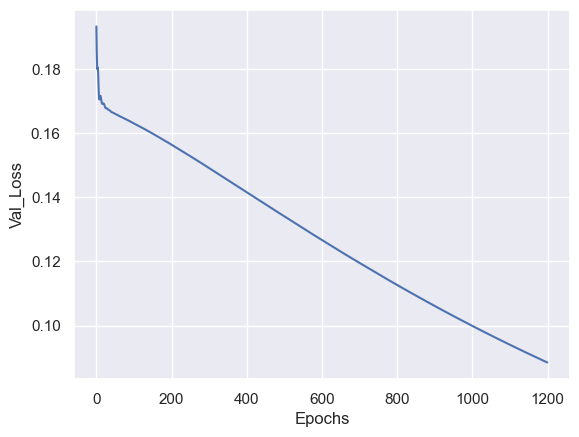

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Giants.h5


In [47]:
predCAFE = modelCAFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 3ms/step


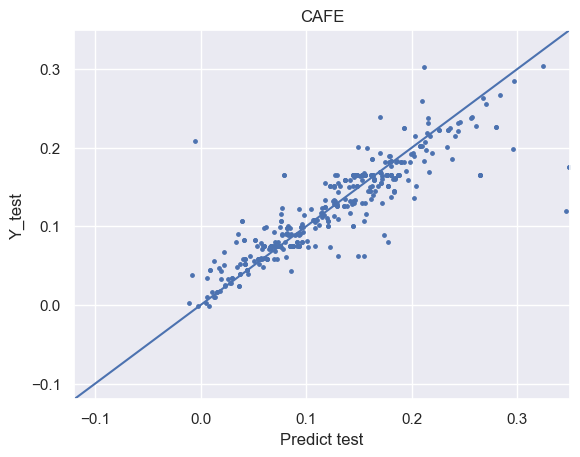

In [48]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [49]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 75.0%


In [50]:
Y_test['CAFE_predict'] = predCAFE

In [51]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0054244      0.159296  
iDR4_3_SPLUS-n05s43_0016456       0.057780  
iDR4_3_SPLUS-s02s24_0028498       0.175843  
iDR4_3_SPLUS-n02n21_0026773       0.074252  
iDR4_3_STRIPE82-0028_0030694      0.058668  
...                                    ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942  
iDR4_3_SPLUS-n06s42_0005104       0.202521  
iDR4_3_SPLUS-n06s42_0005104       0.202521  
iDR4_3_SPLUS-n05s44_0023213       0.052549  
iDR4_3_STRIPE82-0026_0045166      0.164952  

[377 rows x 13 columns]

In [52]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [53]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [54]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

In [55]:
modelNFE = training_model()

In [56]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.3418 - val_loss: 0.2087 - 696ms/epoch - 696ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2040 - val_loss: 0.1940 - 82ms/epoch - 82ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1903 - val_loss: 0.2160 - 98ms/epoch - 98ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2164 - val_loss: 0.2231 - 42ms/epoch - 42ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2258 - val_loss: 0.2111 - 66ms/epoch - 66ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2136 - val_loss: 0.1923 - 96ms/epoch - 96ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1941 - val_loss: 0.1782 - 43ms/epoch - 43ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1795 - val_loss: 0.1732 - 43ms/epoch - 43ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1749 - val_loss: 0.1766 - 41ms/epoch - 41ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1793 - val_loss: 0.1829 - 42ms/epoch - 42ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1866 - val_loss: 0.1864 - 42ms/epoch - 42ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1909 - val_loss: 0.1850 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.189

Text(0, 0.5, 'Loss')

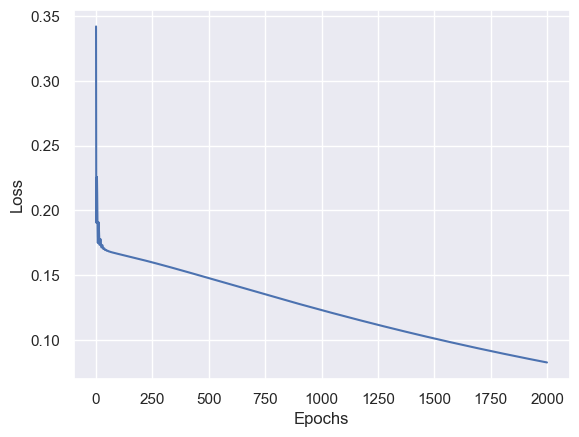

In [57]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

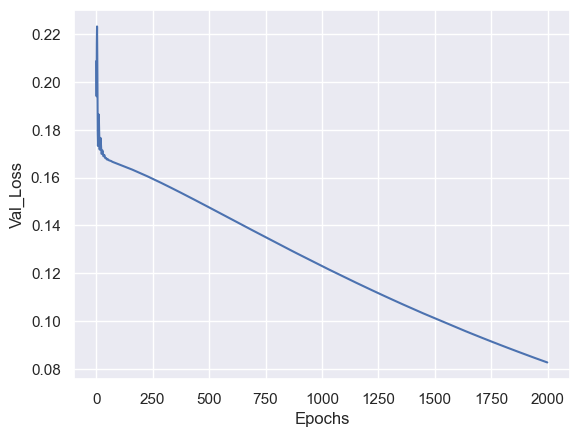

In [58]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [59]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Giants.h5


In [60]:
predNFE = modelNFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 2ms/step


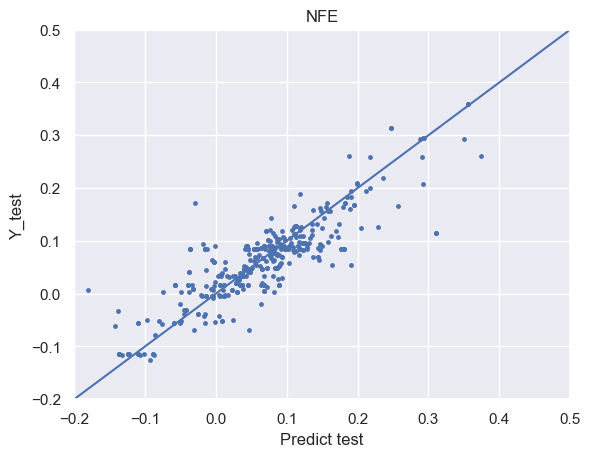

In [61]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [62]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [63]:
Y_test['NFE_predict'] = predNFE

In [64]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202  
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391  
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247  
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277  
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770  
...                                    ...          ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464  
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697  
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755  

[377 rows x 14 columns]

In [65]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [66]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [67]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

In [68]:
modelMGFE = training_model()

In [69]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.2737 - val_loss: 0.2040 - 609ms/epoch - 609ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2015 - val_loss: 0.2146 - 92ms/epoch - 92ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2143 - val_loss: 0.2133 - 113ms/epoch - 113ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2141 - val_loss: 0.1966 - 61ms/epoch - 61ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1971 - val_loss: 0.1823 - 69ms/epoch - 69ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1826 - val_loss: 0.1790 - 57ms/epoch - 57ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1796 - val_loss: 0.1833 - 55ms/epoch - 55ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1844 - val_loss: 0.1862 - 56ms/epoch - 56ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1877 - val_loss: 0.1839 - 58ms/epoch - 58ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1856 - val_loss: 0.1788 - 58ms/epoch - 58ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1802 - val_loss: 0.1750 - 58ms/epoch - 58ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1761 - val_loss: 0.1743 - 59ms/epoch - 59ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

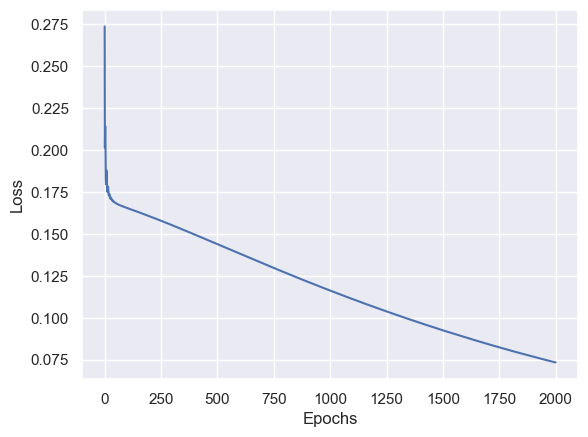

In [70]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

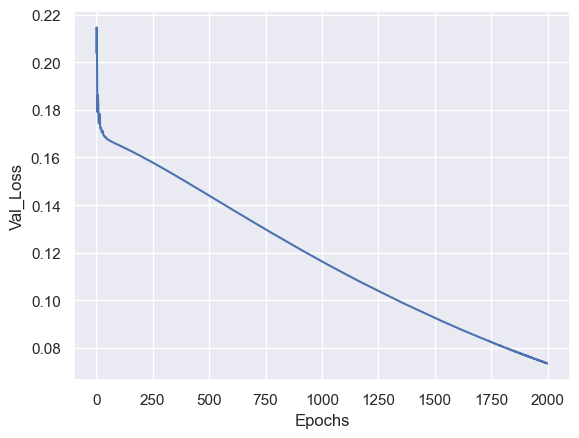

In [71]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [72]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Giants.h5


In [73]:
predMGFE = modelMGFE.predict(X_test)

12/12 [==============================] - 0s 2ms/step


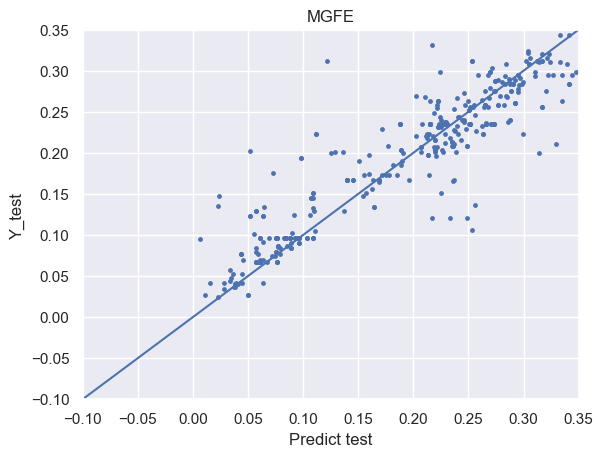

In [74]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [75]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 84.0%


In [76]:
Y_test['MGFE_predict'] = predMGFE

In [77]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778  
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574  
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271  
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749  
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562  
...                                    ...          ...           ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115  
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868  
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654  

[377 rows x 15 columns]

In [78]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [79]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [80]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

In [81]:
modelSIFE = training_model()

In [82]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500


1/1 - 1s - loss: 0.2462 - val_loss: 0.1993 - 641ms/epoch - 641ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.2010 - val_loss: 0.1858 - 72ms/epoch - 72ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.1851 - val_loss: 0.1826 - 67ms/epoch - 67ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.1815 - val_loss: 0.1825 - 68ms/epoch - 68ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.1825 - val_loss: 0.1820 - 58ms/epoch - 58ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.1825 - val_loss: 0.1796 - 57ms/epoch - 57ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.1799 - val_loss: 0.1765 - 46ms/epoch - 46ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.1761 - val_loss: 0.1738 - 50ms/epoch - 50ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.1731 - val_loss: 0.1721 - 50ms/epoch - 50ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.1715 - val_loss: 0.1712 - 52ms/epoch - 52ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.1711 - val_loss: 0.1710 - 49ms/epoch - 49ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.1713 - val_loss: 0.1711 - 52ms/epoch - 52ms/step
Epoch 13/1500
1/1 - 0s - loss: 0.171

Text(0, 0.5, 'Loss')

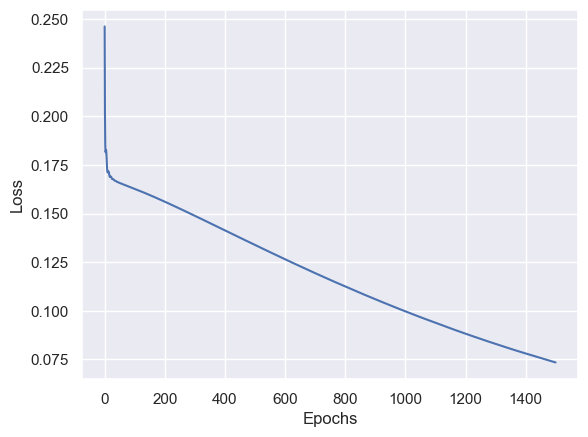

In [83]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

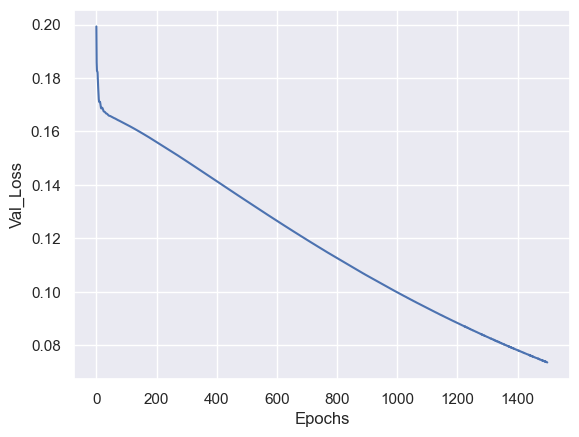

In [84]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [85]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Giants.h5


In [86]:
predSIFE = modelSIFE.predict(X_test)

12/12 [==============================] - 0s 3ms/step


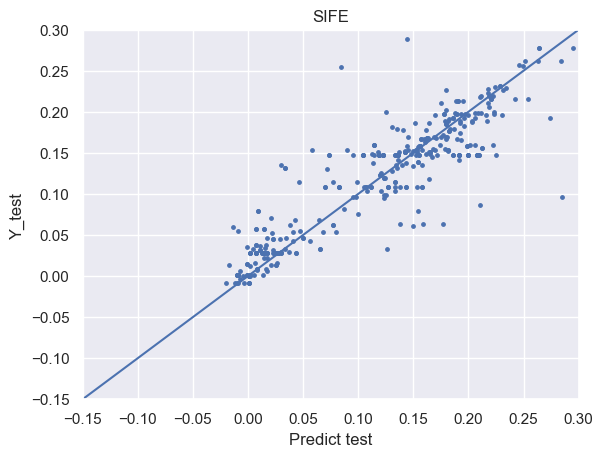

In [87]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [88]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 82.0%


In [89]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [90]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778   
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574   
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271   
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749   
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868   
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0054244      0.150565  
iDR4_3_SPLUS-n05s43_0016456       0.032213  
iDR4_3_SPLUS-s02s24_0028498       0.2

In [91]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [92]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [93]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

In [94]:
modelNIFE = training_model()

In [95]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.1826 - val_loss: 0.1765 - 617ms/epoch - 617ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1761 - val_loss: 0.1705 - 49ms/epoch - 49ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1708 - val_loss: 0.1695 - 48ms/epoch - 48ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1701 - val_loss: 0.1696 - 43ms/epoch - 43ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1705 - val_loss: 0.1697 - 48ms/epoch - 48ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1704 - val_loss: 0.1685 - 48ms/epoch - 48ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1690 - val_loss: 0.1675 - 48ms/epoch - 48ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1679 - val_loss: 0.1676 - 47ms/epoch - 47ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1680 - val_loss: 0.1678 - 47ms/epoch - 47ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1681 - val_loss: 0.1676 - 49ms/epoch - 49ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1678 - val_loss: 0.1676 - 48ms/epoch - 48ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1675 - val_loss: 0.1677 - 46ms/epoch - 46ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.167

Text(0, 0.5, 'Loss')

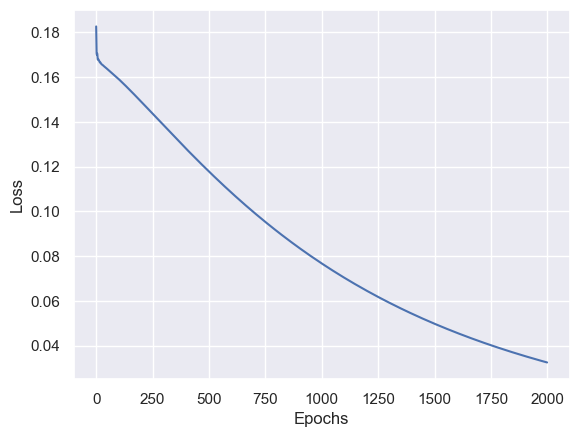

In [96]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

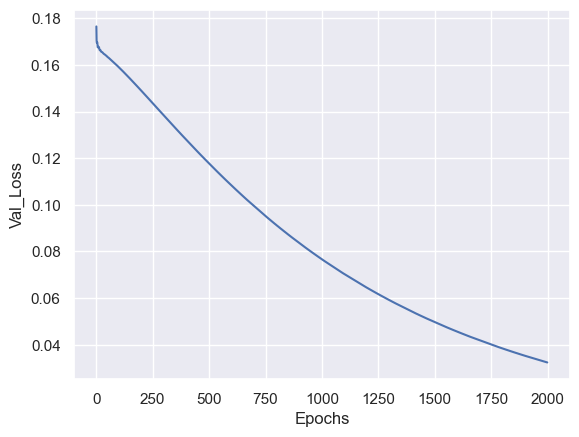

In [97]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [98]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Giants.h5


In [99]:
predNIFE = modelNIFE.predict(X_test)

12/12 [==============================] - 0s 3ms/step


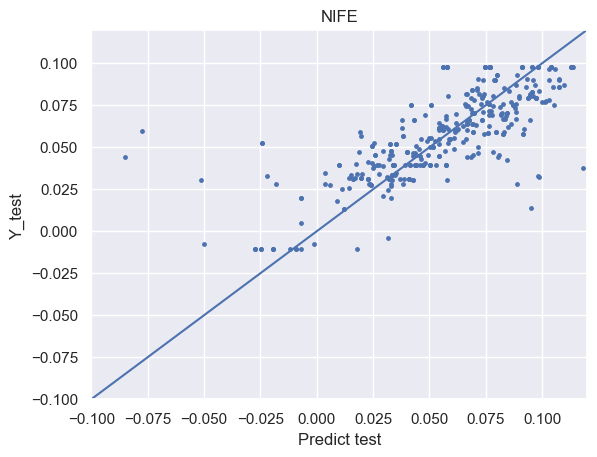

In [100]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [101]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 55.00000000000001%


In [102]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [103]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778   
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574   
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271   
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749   
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868   
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0026_0054244      0.150565      0.079104  
iDR4_3_SPLUS-n05s43_0016456       0.0322

In [104]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")